In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.lines as mlines

In [82]:
column_names = ["HCHO reading", "Location", "Current_date", "Next_date"]
dfs = []
filenames = ['col_mat_nuw_output.csv', 'kan_output.csv', 'mon_kur_jaf_output.csv']  # Add all your filenames here


for filename in filenames:

    df = pd.read_csv(filename, names = column_names)
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)
df.loc[df["Location"] == "Colombo Proper", "Location"] = "Colombo"
df.loc[df["Location"] == "Deniyaya, Matara","Location"] = "Matara"
df.loc[df["Location"] == "Nuwara Eliya Proper","Location"] = "Nuwara Eliya"
df.loc[df["Location"] == "Bibile, Monaragala","Location"] = "Monaragala"
df.loc[df["Location"] == "Kurunegala Proper","Location"] = "Kurunegala"
df.loc[df["Location"] == "Jaffna Proper","Location"] = "Jaffna"
df.loc[df["Location"] == "Kandy Proper","Location"] = "Kandy"
print(df)

       HCHO reading Location Current_date   Next_date
0          0.000197  Colombo   2019-01-01  2019-01-02
1          0.000263  Colombo   2019-01-02  2019-01-03
2          0.000099  Colombo   2019-01-03  2019-01-04
3          0.000210  Colombo   2019-01-04  2019-01-05
4          0.000179  Colombo   2019-01-05  2019-01-06
...             ...      ...          ...         ...
12777           NaN   Jaffna   2023-12-27  2023-12-28
12778      0.000051   Jaffna   2023-12-28  2023-12-29
12779      0.000127   Jaffna   2023-12-29  2023-12-30
12780      0.000117   Jaffna   2023-12-30  2023-12-31
12781      0.000065   Jaffna   2023-12-31  2024-01-01

[12782 rows x 4 columns]


In [83]:
print(df.isna().sum())

HCHO reading    4864
Location           0
Current_date       0
Next_date          0
dtype: int64


In [84]:
df.loc[df['HCHO reading'] < 0 , 'HCHO reading'] = np.nan
print(df[df["HCHO reading"] < 0])
df["Current_date"] = pd.to_datetime(df["Current_date"])
df["Next_date"] = pd.to_datetime(df["Next_date"])
years = [2019,2020,2021,2022,2023]
locations = ["Colombo","Matara","Nuwara Eliya","Monaragala","Kurunegala","Jaffna","Kandy"]
for location in locations:
    for year in years:
        for month in range (1,13):
            filtered = df.loc[(df["Location"] == location) & (df['Current_date'].dt.month == month) & (df['Current_date'].dt.year == year), "HCHO reading"]
            print(filtered)
            print(filtered.mean())
            df.loc[(df["Location"] == location) & 
                   (df['Current_date'].dt.month == month) & 
                   (df['Current_date'].dt.year == year) & 
                   (df['HCHO reading'].isna()), "HCHO reading"] = filtered.mean()
            corrected = df.loc[(df["Location"] == location) & (df['Current_date'].dt.month == month) & (df['Current_date'].dt.year == year), "HCHO reading"]
            print(corrected)
print(df.isna().sum())

Empty DataFrame
Columns: [HCHO reading, Location, Current_date, Next_date]
Index: []
0     0.000197
1     0.000263
2     0.000099
3     0.000210
4     0.000179
5     0.000108
6     0.000393
7     0.000092
8     0.000121
9     0.000130
10    0.000224
11    0.000157
12         NaN
13    0.000134
14    0.000064
15    0.000118
16    0.000247
17    0.000037
18    0.000406
19    0.000169
20    0.000388
21    0.000328
22    0.000215
23    0.000235
24    0.000282
25    0.000251
26    0.000197
27    0.000256
28         NaN
29    0.000171
30    0.000152
Name: HCHO reading, dtype: float64
0.00020067234434556966
0     0.000197
1     0.000263
2     0.000099
3     0.000210
4     0.000179
5     0.000108
6     0.000393
7     0.000092
8     0.000121
9     0.000130
10    0.000224
11    0.000157
12    0.000201
13    0.000134
14    0.000064
15    0.000118
16    0.000247
17    0.000037
18    0.000406
19    0.000169
20    0.000388
21    0.000328
22    0.000215
23    0.000235
24    0.000282
25    0.000251
26

365    0.000191
366    0.000176
367    0.000181
368    0.000222
369    0.000145
370    0.000231
371    0.000166
372    0.000159
373    0.000177
374    0.000286
375    0.000085
376    0.000107
377    0.000239
378    0.000234
379    0.000248
380         NaN
381    0.000252
382    0.000197
383    0.000342
384    0.000142
385    0.000107
386    0.000089
387    0.000177
388    0.000202
389    0.000175
390    0.000150
391    0.000198
392    0.000232
393    0.000202
394    0.000306
395    0.000345
Name: HCHO reading, dtype: float64
0.0001987663384742558
365    0.000191
366    0.000176
367    0.000181
368    0.000222
369    0.000145
370    0.000231
371    0.000166
372    0.000159
373    0.000177
374    0.000286
375    0.000085
376    0.000107
377    0.000239
378    0.000234
379    0.000248
380    0.000199
381    0.000252
382    0.000197
383    0.000342
384    0.000142
385    0.000107
386    0.000089
387    0.000177
388    0.000202
389    0.000175
390    0.000150
391    0.000198
392    0.000232

882    0.000157
883    0.000108
884    0.000107
885    0.000107
886    0.000107
887    0.000185
888    0.000118
889    0.000107
890    0.000088
891    0.000135
892    0.000107
893    0.000053
894    0.000107
895    0.000219
896    0.000133
897    0.000021
898    0.000026
899    0.000140
900    0.000034
901    0.000066
902    0.000162
903    0.000107
904    0.000121
905    0.000070
906    0.000081
907    0.000107
908    0.000153
909    0.000082
910    0.000107
911    0.000094
Name: HCHO reading, dtype: float64
912         NaN
913    0.000261
914    0.000420
915         NaN
916         NaN
917         NaN
918         NaN
919         NaN
920         NaN
921         NaN
922         NaN
923         NaN
924    0.000048
925         NaN
926         NaN
927         NaN
928         NaN
929    0.000239
930    0.000044
931    0.000087
932    0.000146
933         NaN
934    0.000034
935         NaN
936         NaN
937         NaN
938    0.000099
939    0.000026
940    0.000097
941    0.000116
942  

1430    0.000227
1431    0.000187
1432    0.000147
1433    0.000095
1434    0.000182
1435    0.000128
1436    0.000183
1437    0.000183
1438    0.000183
1439    0.000183
1440    0.000183
1441    0.000183
1442    0.000157
1443    0.000246
1444    0.000066
1445    0.000192
1446    0.000252
1447    0.000183
1448    0.000183
1449    0.000125
1450    0.000183
1451    0.000194
1452    0.000183
1453    0.000018
1454    0.000183
1455    0.000111
1456    0.000168
1457    0.000170
1458    0.000298
1459    0.000226
1460    0.000477
Name: HCHO reading, dtype: float64
1461    0.000220
1462    0.000210
1463    0.000160
1464    0.000242
1465    0.000277
1466    0.000069
1467         NaN
1468         NaN
1469    0.000143
1470    0.000121
1471    0.000221
1472    0.000231
1473    0.000319
1474    0.000210
1475    0.000240
1476    0.000272
1477         NaN
1478    0.000257
1479    0.000267
1480    0.000194
1481         NaN
1482         NaN
1483         NaN
1484         NaN
1485    0.000160
1486    0.000

1977    7.860539e-05
1978    8.187249e-05
1979    1.947567e-05
1980    8.187249e-05
1981    8.187249e-05
1982    8.187249e-05
1983    8.187249e-05
1984    8.187249e-05
1985    8.825731e-05
1986    8.187249e-05
1987    2.606537e-04
1988    8.187249e-05
1989    1.034896e-04
1990    8.187249e-05
1991    9.794863e-05
1992    1.217725e-04
1993    8.187249e-05
1994    8.187249e-05
1995    8.187249e-05
1996    3.626547e-05
1997    8.187249e-05
1998    8.187249e-05
1999    8.187249e-05
2000    8.187249e-05
2001    3.066724e-05
2002    5.938477e-05
2003    1.501881e-04
2004    8.485600e-08
2005    1.865871e-05
2006    8.076290e-05
Name: HCHO reading, dtype: float64
2007    0.000157
2008    0.000078
2009         NaN
2010    0.000065
2011    0.000102
2012    0.000185
2013    0.000095
2014    0.000122
2015         NaN
2016    0.000035
2017    0.000094
2018    0.000098
2019    0.000155
2020    0.000031
2021         NaN
2022    0.000039
2023         NaN
2024         NaN
2025         NaN
2026        

2526         NaN
2527         NaN
2528    0.000029
2529    0.000104
2530    0.000067
2531    0.000120
2532    0.000076
2533    0.000008
2534    0.000085
2535    0.000197
2536         NaN
2537    0.000128
2538         NaN
2539    0.000334
2540    0.000051
2541    0.000081
2542    0.000255
2543         NaN
2544         NaN
2545         NaN
2546         NaN
2547         NaN
2548         NaN
2549         NaN
2550         NaN
2551         NaN
2552    0.000059
2553         NaN
2554         NaN
2555    0.000154
2556         NaN
Name: HCHO reading, dtype: float64
0.0001165863732424755
2526    0.000117
2527    0.000117
2528    0.000029
2529    0.000104
2530    0.000067
2531    0.000120
2532    0.000076
2533    0.000008
2534    0.000085
2535    0.000197
2536    0.000117
2537    0.000128
2538    0.000117
2539    0.000334
2540    0.000051
2541    0.000081
2542    0.000255
2543    0.000117
2544    0.000117
2545    0.000117
2546    0.000117
2547    0.000117
2548    0.000117
2549    0.000117
2550    

3042    0.000124
3043    0.000190
3044    0.000124
3045    0.000124
3046    0.000116
3047    0.000184
3048    0.000113
3049    0.000124
3050    0.000138
3051    0.000124
3052    0.000207
3053    0.000124
3054    0.000124
3055    0.000124
3056    0.000020
3057    0.000124
3058    0.000124
3059    0.000124
3060    0.000124
3061    0.000124
3062    0.000124
3063    0.000051
3064    0.000124
3065    0.000124
3066    0.000049
3067    0.000124
3068    0.000124
3069    0.000169
3070    0.000124
3071    0.000124
3072    0.000124
Name: HCHO reading, dtype: float64
3073             NaN
3074             NaN
3075    1.207036e-04
3076    1.450343e-05
3077    7.789365e-05
3078             NaN
3079    1.824895e-04
3080    9.900891e-05
3081             NaN
3082    1.269451e-04
3083             NaN
3084    2.555792e-04
3085    3.401435e-05
3086    9.853321e-05
3087             NaN
3088             NaN
3089             NaN
3090    7.057255e-05
3091             NaN
3092    1.710037e-04
3093             N

3591    0.000102
3592    0.000102
3593    0.000102
3594    0.000102
3595    0.000102
3596    0.000102
3597    0.000102
3598    0.000212
3599    0.000102
3600    0.000102
3601    0.000082
3602    0.000102
3603    0.000102
3604    0.000102
3605    0.000102
3606    0.000095
3607    0.000035
3608    0.000102
3609    0.000102
3610    0.000059
3611    0.000102
3612    0.000102
3613    0.000139
3614    0.000102
3615    0.000097
3616    0.000089
3617    0.000109
3618    0.000102
3619    0.000102
3620    0.000102
Name: HCHO reading, dtype: float64
3621         NaN
3622    0.000228
3623         NaN
3624         NaN
3625         NaN
3626         NaN
3627    0.000183
3628         NaN
3629         NaN
3630         NaN
3631    0.000092
3632         NaN
3633         NaN
3634         NaN
3635         NaN
3636         NaN
3637         NaN
3638         NaN
3639    0.000011
3640    0.000128
3641    0.000022
3642         NaN
3643    0.000053
3644    0.000063
3645    0.000072
3646    0.000059
3647    0.000

4169    0.000086
4170    0.000035
4171    0.000154
4172    0.000114
4173    0.000078
4174         NaN
4175         NaN
4176         NaN
4177    0.000034
4178         NaN
4179         NaN
4180         NaN
4181    0.000159
4182         NaN
4183         NaN
4184         NaN
4185    0.000144
4186    0.000101
4187    0.000028
4188    0.000007
4189         NaN
4190    0.000118
4191         NaN
4192    0.000206
4193         NaN
4194         NaN
4195    0.000014
4196         NaN
4197    0.000055
4198    0.000055
Name: HCHO reading, dtype: float64
8.68604751159456e-05
4169    0.000086
4170    0.000035
4171    0.000154
4172    0.000114
4173    0.000078
4174    0.000087
4175    0.000087
4176    0.000087
4177    0.000034
4178    0.000087
4179    0.000087
4180    0.000087
4181    0.000159
4182    0.000087
4183    0.000087
4184    0.000087
4185    0.000144
4186    0.000101
4187    0.000028
4188    0.000007
4189    0.000087
4190    0.000118
4191    0.000087
4192    0.000206
4193    0.000087
4194    0

4717    0.000043
4718    0.000090
4719    0.000090
4720    0.000090
4721    0.000090
4722    0.000090
4723    0.000128
4724    0.000052
4725    0.000120
4726    0.000045
4727    0.000090
4728    0.000090
4729    0.000090
4730    0.000090
4731    0.000090
4732    0.000090
4733    0.000048
4734    0.000090
4735    0.000090
4736    0.000063
4737    0.000090
4738    0.000137
4739    0.000038
4740    0.000069
4741    0.000175
4742    0.000111
4743    0.000087
4744    0.000146
4745    0.000056
4746    0.000116
4747    0.000090
Name: HCHO reading, dtype: float64
4748         NaN
4749         NaN
4750         NaN
4751         NaN
4752         NaN
4753         NaN
4754    0.000064
4755         NaN
4756         NaN
4757         NaN
4758         NaN
4759         NaN
4760         NaN
4761         NaN
4762    0.000097
4763         NaN
4764         NaN
4765         NaN
4766         NaN
4767         NaN
4768    0.000096
4769    0.000201
4770    0.000214
4771         NaN
4772    0.000258
4773    0.000

5233    0.000093
5234    0.000093
5235    0.000120
5236    0.000093
5237    0.000093
5238    0.000093
5239    0.000093
5240    0.000093
5241    0.000093
5242    0.000093
5243    0.000093
5244    0.000128
5245    0.000053
5246    0.000090
5247    0.000176
5248    0.000067
5249    0.000093
5250    0.000093
5251    0.000093
5252    0.000122
5253    0.000093
5254    0.000093
5255    0.000093
5256    0.000093
5257    0.000050
5258    0.000117
5259    0.000069
5260    0.000026
5261    0.000093
5262    0.000093
5263    0.000093
Name: HCHO reading, dtype: float64
5264         NaN
5265         NaN
5266         NaN
5267    0.000116
5268    0.000272
5269    0.000222
5270         NaN
5271         NaN
5272    0.000070
5273    0.000192
5274    0.000367
5275         NaN
5276         NaN
5277         NaN
5278    0.000027
5279    0.000185
5280    0.000046
5281         NaN
5282         NaN
5283    0.000069
5284         NaN
5285    0.000055
5286         NaN
5287    0.000044
5288         NaN
5289         

7577    0.000101
7578    0.000036
7579    0.000082
7580    0.000045
7581    0.000185
7582    0.000080
7583    0.000020
7584    0.000091
7585    0.000045
7586    0.000198
7587    0.000082
7588    0.000067
7589    0.000083
7590    0.000082
7591    0.000082
7592    0.000082
7593    0.000074
7594    0.000082
7595    0.000082
7596    0.000082
7597    0.000082
7598    0.000042
7599    0.000082
7600    0.000082
7601    0.000082
7602    0.000082
7603    0.000082
7604    0.000082
7605    0.000082
7606    0.000082
7607    0.000082
Name: HCHO reading, dtype: float64
7608    0.000080
7609    0.000073
7610         NaN
7611    0.000103
7612    0.000060
7613    0.000124
7614    0.000114
7615         NaN
7616         NaN
7617         NaN
7618    0.000079
7619    0.000012
7620    0.000090
7621    0.000045
7622         NaN
7623    0.000072
7624    0.000037
7625    0.000110
7626    0.000009
7627         NaN
7628    0.000010
7629         NaN
7630         NaN
7631         NaN
7632         NaN
7633         

8125    0.000273
8126    0.000241
8127    0.000165
8128    0.000231
8129    0.000163
8130    0.000145
8131    0.000103
8132    0.000143
8133    0.000149
8134    0.000149
8135    0.000107
8136    0.000130
8137    0.000149
8138    0.000149
8139    0.000149
8140    0.000105
8141    0.000075
8142    0.000141
8143    0.000135
8144    0.000162
8145    0.000209
8146    0.000162
8147    0.000122
8148    0.000193
8149    0.000129
8150    0.000130
8151    0.000149
8152    0.000134
8153    0.000021
8154    0.000149
Name: HCHO reading, dtype: float64
8155         NaN
8156    0.000163
8157    0.000221
8158         NaN
8159         NaN
8160    0.000100
8161         NaN
8162    0.000193
8163    0.000093
8164    0.000354
8165         NaN
8166         NaN
8167         NaN
8168         NaN
8169         NaN
8170    0.000105
8171    0.000028
8172    0.000316
8173    0.000535
8174         NaN
8175         NaN
8176         NaN
8177         NaN
8178    0.000156
8179    0.000097
8180         NaN
8181         

8704    0.000082
8705         NaN
8706         NaN
8707    0.000218
8708         NaN
8709    0.000265
8710         NaN
8711         NaN
8712         NaN
8713         NaN
8714         NaN
8715         NaN
8716         NaN
8717    0.000097
8718         NaN
8719    0.000430
8720    0.000069
8721         NaN
8722         NaN
8723    0.000096
8724    0.000179
8725    0.000125
8726    0.000089
8727         NaN
8728    0.000174
8729    0.000233
8730    0.000097
8731    0.000076
8732    0.000091
8733    0.000034
Name: HCHO reading, dtype: float64
0.0001472508417251391
8704    0.000082
8705    0.000147
8706    0.000147
8707    0.000218
8708    0.000147
8709    0.000265
8710    0.000147
8711    0.000147
8712    0.000147
8713    0.000147
8714    0.000147
8715    0.000147
8716    0.000147
8717    0.000097
8718    0.000147
8719    0.000430
8720    0.000069
8721    0.000147
8722    0.000147
8723    0.000096
8724    0.000179
8725    0.000125
8726    0.000089
8727    0.000147
8728    0.000174
8729    

9250    0.000158
9251    0.000180
9252    0.000143
9253    0.000219
9254    0.000080
9255    0.000142
9256    0.000165
9257    0.000146
9258    0.000149
9259    0.000206
9260    0.000164
9261    0.000118
9262    0.000133
9263    0.000071
9264    0.000110
9265    0.000140
9266    0.000098
9267    0.000167
9268    0.000171
9269    0.000170
9270    0.000087
9271    0.000143
9272    0.000132
9273    0.000148
9274    0.000052
9275    0.000062
9276    0.000155
9277    0.000148
9278    0.000259
9279    0.000184
9280    0.000136
Name: HCHO reading, dtype: float64
9281    0.000290
9282    0.000087
9283    0.000053
9284         NaN
9285    0.000183
9286    0.000111
9287         NaN
9288    0.000102
9289    0.000103
9290    0.000071
9291         NaN
9292    0.000076
9293    0.000099
9294    0.000045
9295    0.000089
9296    0.000104
9297    0.000063
9298    0.000040
9299    0.000081
9300    0.000065
9301         NaN
9302    0.000063
9303    0.000004
9304    0.000024
9305         NaN
9306         

9830    0.000125
9831    0.000125
9832    0.000125
9833    0.000125
9834    0.000125
9835    0.000181
9836    0.000157
9837    0.000125
9838    0.000142
9839    0.000149
9840    0.000191
9841    0.000065
9842    0.000080
9843    0.000179
9844    0.000042
9845    0.000124
9846    0.000271
9847    0.000118
9848    0.000014
9849    0.000125
9850    0.000125
9851    0.000125
9852    0.000138
9853    0.000094
9854    0.000090
9855    0.000125
9856    0.000125
9857    0.000125
9858    0.000030
9859    0.000179
9860    0.000125
Name: HCHO reading, dtype: float64
9861         NaN
9862         NaN
9863         NaN
9864         NaN
9865         NaN
9866    0.000079
9867         NaN
9868    0.000135
9869         NaN
9870         NaN
9871         NaN
9872         NaN
9873         NaN
9874    0.000196
9875         NaN
9876    0.000147
9877         NaN
9878         NaN
9879         NaN
9880    0.000059
9881    0.000140
9882    0.000025
9883    0.000130
9884    0.000033
9885    0.000078
9886    0.000

10407    0.000167
10408    0.000077
10409         NaN
10410    0.000112
10411         NaN
10412         NaN
10413         NaN
10414    0.000075
10415         NaN
10416         NaN
10417         NaN
10418         NaN
10419    0.000065
10420         NaN
10421         NaN
10422         NaN
10423         NaN
10424         NaN
10425         NaN
10426    0.000043
10427         NaN
10428         NaN
10429    0.000085
10430         NaN
10431    0.000255
10432    0.000256
10433         NaN
10434    0.000341
10435    0.000362
10436    0.000228
10437    0.000135
Name: HCHO reading, dtype: float64
0.00016933260856679636
10407    0.000167
10408    0.000077
10409    0.000169
10410    0.000112
10411    0.000169
10412    0.000169
10413    0.000169
10414    0.000075
10415    0.000169
10416    0.000169
10417    0.000169
10418    0.000169
10419    0.000065
10420    0.000169
10421    0.000169
10422    0.000169
10423    0.000169
10424    0.000169
10425    0.000169
10426    0.000043
10427    0.000169
10428 

10925         NaN
10926    0.000183
10927         NaN
10928         NaN
10929         NaN
10930    0.000009
10931    0.000171
10932         NaN
10933    0.000069
10934         NaN
10935    0.000159
10936         NaN
10937    0.000103
10938         NaN
10939         NaN
10940         NaN
10941    0.000025
10942         NaN
10943    0.000199
10944         NaN
10945    0.000114
10946    0.000160
10947    0.000063
10948         NaN
10949    0.000094
10950    0.000152
10951    0.000075
10952         NaN
10953         NaN
10954    0.000158
10955         NaN
Name: HCHO reading, dtype: float64
0.00011562898681607532
10925    0.000116
10926    0.000183
10927    0.000116
10928    0.000116
10929    0.000116
10930    0.000009
10931    0.000171
10932    0.000116
10933    0.000069
10934    0.000116
10935    0.000159
10936    0.000116
10937    0.000103
10938    0.000116
10939    0.000116
10940    0.000116
10941    0.000025
10942    0.000116
10943    0.000199
10944    0.000116
10945    0.000114
10946 

11442    0.000179
11443    0.000197
11444    0.000109
11445    0.000166
11446    0.000124
11447    0.000102
11448    0.000107
11449    0.000138
11450    0.000133
11451    0.000138
11452    0.000138
11453    0.000138
11454    0.000048
11455    0.000135
11456    0.000012
11457    0.000138
11458    0.000334
11459    0.000010
11460    0.000187
11461    0.000100
11462    0.000154
11463    0.000078
11464    0.000183
11465    0.000210
11466    0.000195
11467    0.000100
11468    0.000235
11469    0.000248
11470    0.000096
11471    0.000065
11472    0.000077
Name: HCHO reading, dtype: float64
11473    6.290529e-05
11474    5.548682e-05
11475    7.928967e-05
11476    4.191963e-05
11477    7.336406e-05
11478    9.408242e-05
11479    5.997512e-05
11480    1.025361e-04
11481    1.555771e-04
11482             NaN
11483             NaN
11484             NaN
11485    1.193467e-04
11486    1.056401e-04
11487    4.320398e-05
11488    1.064703e-04
11489    8.606756e-05
11490    1.537568e-04
11491    1.

11960    0.000106
11961    0.000106
11962    0.000031
11963    0.000106
11964    0.000106
11965    0.000116
11966    0.000067
11967    0.000106
11968    0.000106
11969    0.000161
11970    0.000106
11971    0.000065
11972    0.000093
11973    0.000006
11974    0.000161
11975    0.000106
11976    0.000112
11977    0.000033
11978    0.000046
11979    0.000106
11980    0.000008
11981    0.000207
11982    0.000140
11983    0.000106
11984    0.000141
11985    0.000283
11986    0.000127
11987    0.000106
11988    0.000106
11989    0.000106
11990    0.000106
Name: HCHO reading, dtype: float64
11991         NaN
11992    0.000022
11993         NaN
11994    0.000259
11995         NaN
11996         NaN
11997    0.000163
11998         NaN
11999         NaN
12000         NaN
12001    0.000060
12002         NaN
12003         NaN
12004         NaN
12005         NaN
12006         NaN
12007         NaN
12008         NaN
12009    0.000077
12010    0.000042
12011    0.000086
12012         NaN
12013    0.

12476    0.000113
12477    0.000231
12478    0.000099
12479    0.000027
12480    0.000040
12481    0.000121
12482    0.000119
12483    0.000088
12484    0.000069
12485    0.000143
12486    0.000095
12487    0.000215
12488    0.000192
12489    0.000083
12490    0.000003
12491    0.000122
12492    0.000147
12493    0.000143
12494    0.000169
12495    0.000141
12496    0.000214
12497    0.000170
12498    0.000217
12499    0.000519
12500    0.000107
12501    0.000122
12502    0.000165
12503    0.000237
12504    0.000229
12505    0.000082
12506    0.000014
Name: HCHO reading, dtype: float64
12507    0.000084
12508    0.000132
12509    0.000102
12510    0.000187
12511    0.000111
12512    0.000007
12513    0.000182
12514    0.000062
12515    0.000045
12516    0.000151
12517    0.000135
12518    0.000153
12519    0.000216
12520    0.000179
12521         NaN
12522    0.000131
12523    0.000011
12524    0.000118
12525    0.000094
12526    0.000101
12527    0.000129
12528    0.000112
12529    0.

5721    0.000114
5722    0.000104
5723    0.000125
5724    0.000114
5725    0.000114
5726    0.000114
5727    0.000114
5728    0.000131
5729    0.000064
5730    0.000114
5731    0.000114
5732    0.000038
5733    0.000055
5734    0.000027
5735    0.000114
5736    0.000114
5737    0.000114
5738    0.000114
5739    0.000114
5740    0.000114
5741    0.000114
5742    0.000114
5743    0.000114
5744    0.000114
5745    0.000114
5746    0.000114
5747    0.000319
5748    0.000114
5749    0.000166
5750    0.000114
Name: HCHO reading, dtype: float64
5751         NaN
5752         NaN
5753    0.000073
5754    0.000135
5755    0.000212
5756         NaN
5757         NaN
5758    0.000259
5759    0.000055
5760    0.000184
5761         NaN
5762         NaN
5763    0.000168
5764    0.000063
5765    0.000072
5766         NaN
5767         NaN
5768         NaN
5769    0.000007
5770         NaN
5771         NaN
5772         NaN
5773         NaN
5774         NaN
5775    0.000128
5776         NaN
5777         

6268    0.000080
6269    0.000111
6270    0.000086
6271    0.000121
6272    0.000111
6273    0.000111
6274    0.000111
6275    0.000111
6276    0.000074
6277    0.000111
6278    0.000111
6279    0.000185
6280    0.000072
6281    0.000046
6282    0.000160
6283    0.000112
6284    0.000218
6285    0.000111
6286    0.000111
6287    0.000053
6288    0.000111
6289    0.000036
6290    0.000111
6291    0.000111
6292    0.000111
6293    0.000111
6294    0.000111
6295    0.000111
6296    0.000099
6297    0.000143
6298    0.000182
Name: HCHO reading, dtype: float64
6299    0.000204
6300    0.000272
6301    0.000143
6302    0.000173
6303    0.000210
6304    0.000227
6305    0.000040
6306    0.000002
6307         NaN
6308         NaN
6309         NaN
6310    0.000214
6311         NaN
6312         NaN
6313    0.000165
6314    0.000131
6315    0.000194
6316    0.000183
6317    0.000115
6318    0.000067
6319    0.000152
6320    0.000214
6321    0.000178
6322    0.000167
6323         NaN
6324    0.000

6847    0.000153
6848    0.000153
6849    0.000153
6850    0.000187
6851    0.000153
6852    0.000153
6853    0.000153
6854    0.000264
6855    0.000153
6856    0.000153
6857    0.000153
6858    0.000153
6859    0.000153
6860    0.000153
6861    0.000153
6862    0.000153
6863    0.000153
6864    0.000153
6865    0.000153
6866    0.000153
6867    0.000153
6868    0.000153
6869    0.000153
6870    0.000068
6871    0.000153
6872    0.000153
6873    0.000153
6874    0.000113
6875    0.000134
6876    0.000153
6877    0.000153
Name: HCHO reading, dtype: float64
6878         NaN
6879         NaN
6880         NaN
6881    0.000105
6882         NaN
6883    0.000017
6884    0.000150
6885         NaN
6886         NaN
6887         NaN
6888         NaN
6889         NaN
6890         NaN
6891         NaN
6892         NaN
6893         NaN
6894    0.000261
6895    0.000122
6896         NaN
6897    0.000237
6898    0.000158
6899    0.000026
6900    0.000050
6901    0.000155
6902    0.000144
6903    0.000

In [85]:
print(df[df["HCHO reading"] < 0])

Empty DataFrame
Columns: [HCHO reading, Location, Current_date, Next_date]
Index: []


In [86]:
for location in locations:
    print("\n")
    print(location)
    print("\n")
    print(df.loc[df["Location"] == location, "HCHO reading"].describe())
    print("\n")



Colombo


count    1.826000e+03
mean     1.612387e-04
std      8.124895e-05
min      2.111934e-07
25%      1.046474e-04
50%      1.463385e-04
75%      2.078185e-04
max      6.500631e-04
Name: HCHO reading, dtype: float64




Matara


count    1.826000e+03
mean     1.079941e-04
std      6.346608e-05
min      8.485600e-08
25%      7.319883e-05
50%      1.019758e-04
75%      1.319276e-04
max      8.997102e-04
Name: HCHO reading, dtype: float64




Nuwara Eliya


count    1.826000e+03
mean     1.031389e-04
std      4.789613e-05
min      4.363303e-07
25%      7.258764e-05
50%      9.808395e-05
75%      1.280047e-04
max      4.191362e-04
Name: HCHO reading, dtype: float64




Monaragala


count    1.826000e+03
mean     1.349352e-04
std      6.580270e-05
min      1.461232e-07
25%      8.871262e-05
50%      1.341801e-04
75%      1.653453e-04
max      5.348281e-04
Name: HCHO reading, dtype: float64




Kurunegala


count    1.826000e+03
mean     1.388141e-04
std      6.575848e-05
min      1.4

<Axes: xlabel='Location', ylabel='HCHO reading'>

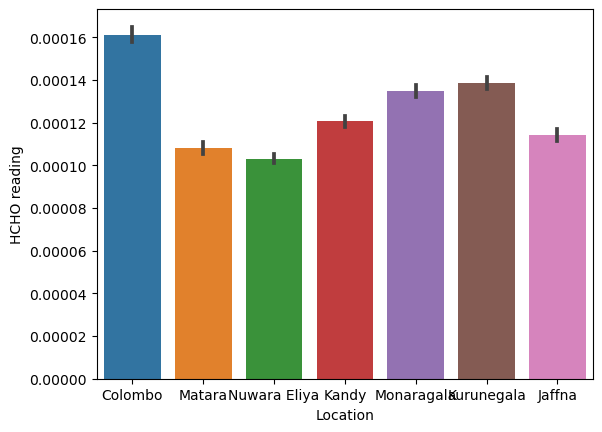

In [87]:
sns.barplot(data=df, x='Location', y='HCHO reading')

<Axes: xlabel='HCHO reading', ylabel='Count'>

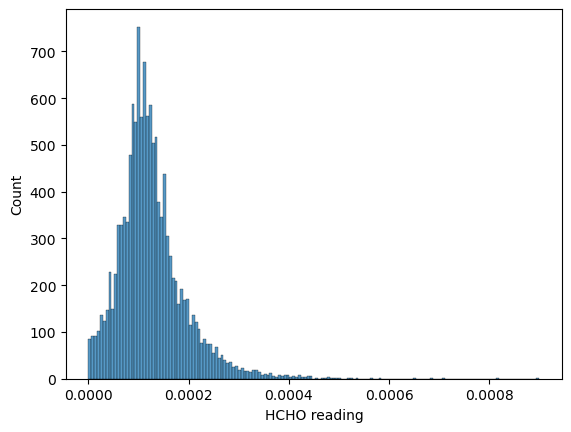

In [88]:
sns.histplot(data=df, x='HCHO reading')

<Axes: xlabel='Current_date', ylabel='HCHO reading'>

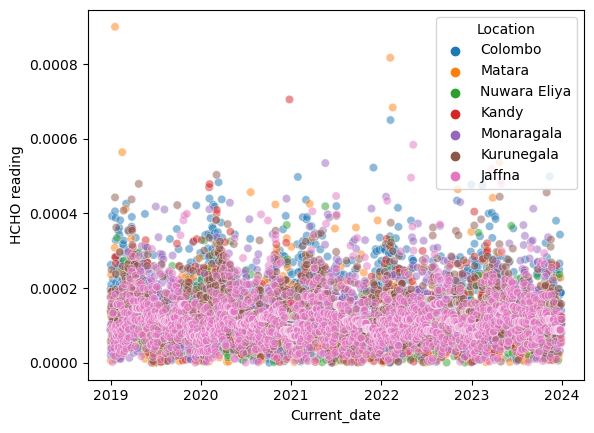

In [89]:
sns.scatterplot(data=df, x='Current_date', y='HCHO reading', hue='Location', alpha=0.5)

[<Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]


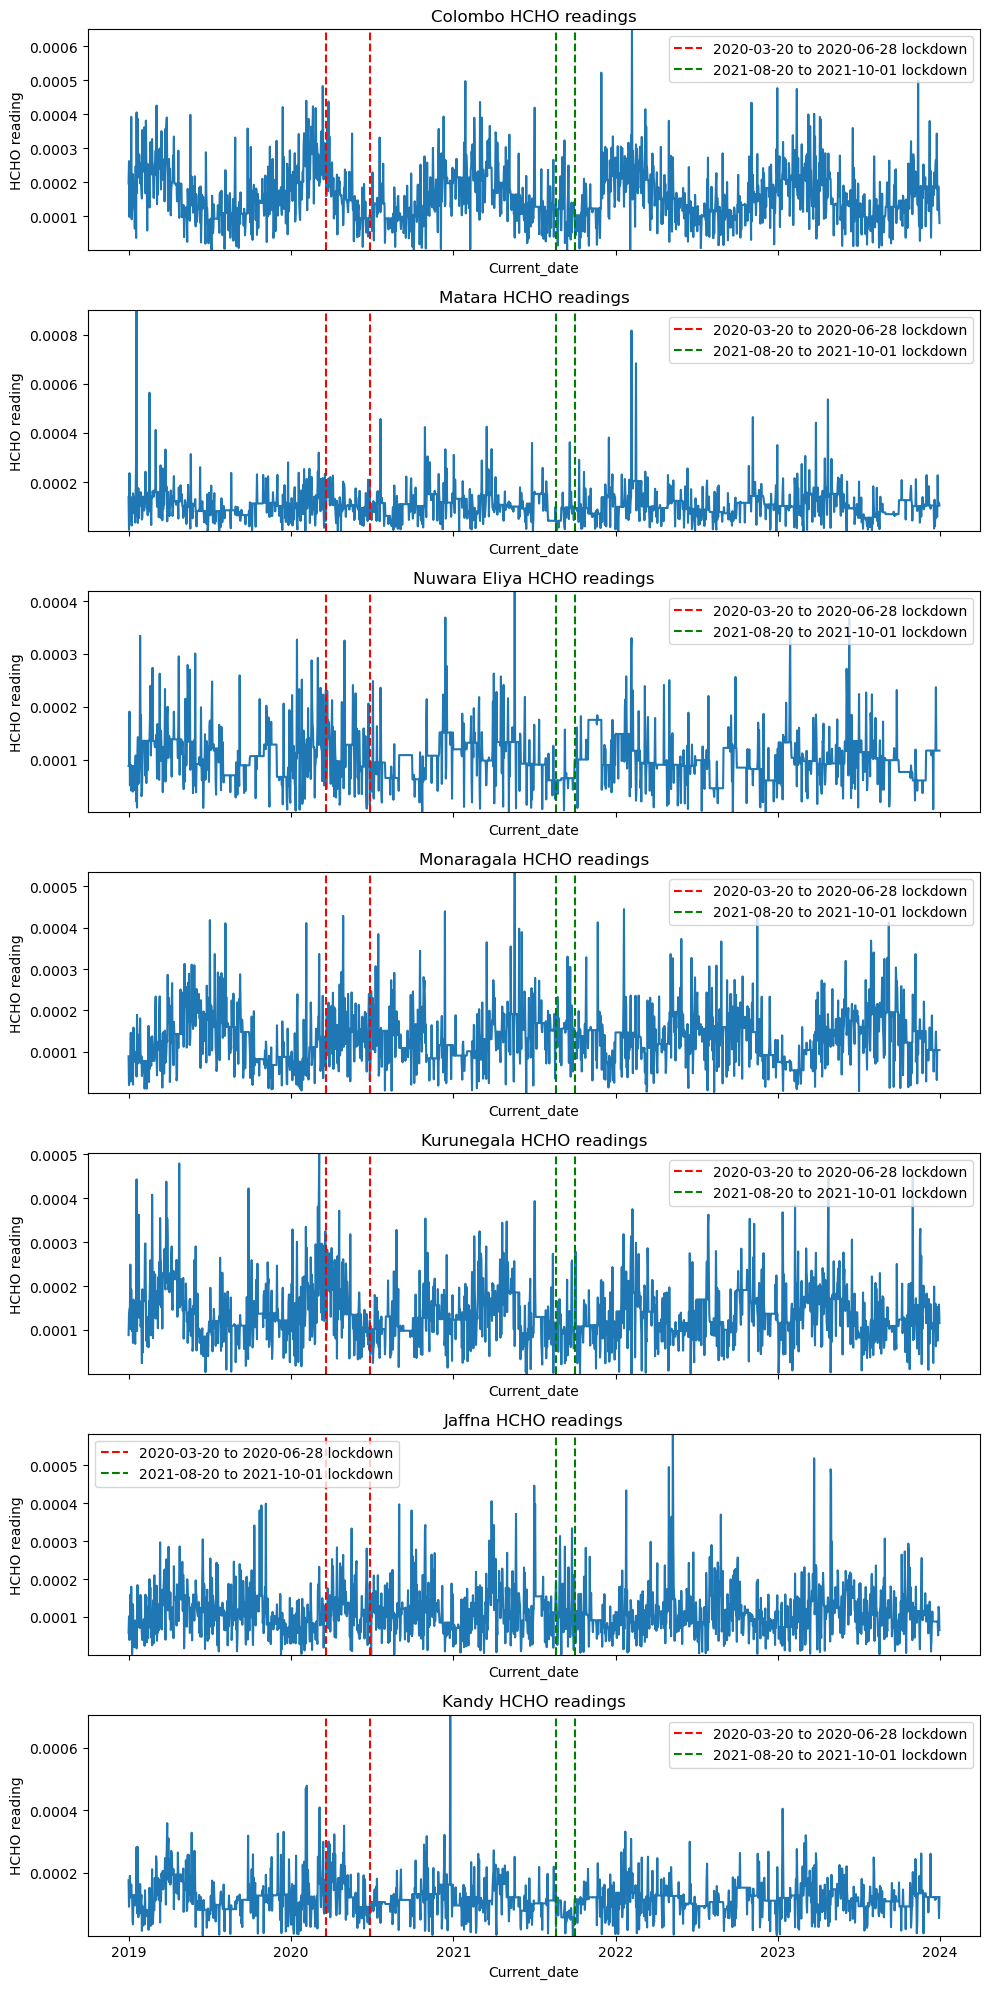

In [90]:
fig, axes = plt.subplots(nrows=len(locations), ncols=1, figsize=(10, 20), sharex=True)
print(axes)
print(zip(locations, axes))
for (location, ax) in zip(locations, axes):
    sub_df = df[df["Location"] == location]
    x = sub_df["Current_date"]
    y = sub_df["HCHO reading"]
    
    # Plot data on the current Axes object
    ax.plot(x, y)

    # Get the range of y-values
    y_min = min(y)
    y_max = max(y)

    # Set the y-axis limits based on the range of y-values
    ax.set_ylim(y_min, y_max)

    # Add lines in the y-axis
    ax.axvline(x=datetime.strptime('2020-03-20', '%Y-%m-%d'), color='r', linestyle='--')
    ax.axvline(x=datetime.strptime('2020-06-28', '%Y-%m-%d'), color='r', linestyle='--')
    ax.axvline(x=datetime.strptime('2021-08-20', '%Y-%m-%d'), color='g', linestyle='--')
    ax.axvline(x=datetime.strptime('2021-10-01', '%Y-%m-%d'), color='g', linestyle='--')
    
    # Add labels and title
    ax.set_xlabel('Current_date')
    ax.set_ylabel('HCHO reading')
    ax.set_title(f'{location} HCHO readings')
    red_line = plt.Line2D([], [], color='r', linestyle='--', label='2020-03-20 to 2020-06-28 lockdown')
    green_line = plt.Line2D([], [], color='g', linestyle='--', label='2021-08-20 to 2021-10-01 lockdown')
    ax.legend(handles=[red_line, green_line]) 

# Adjust layout and show the plot
plt.tight_layout()
plt.show()




[<Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]


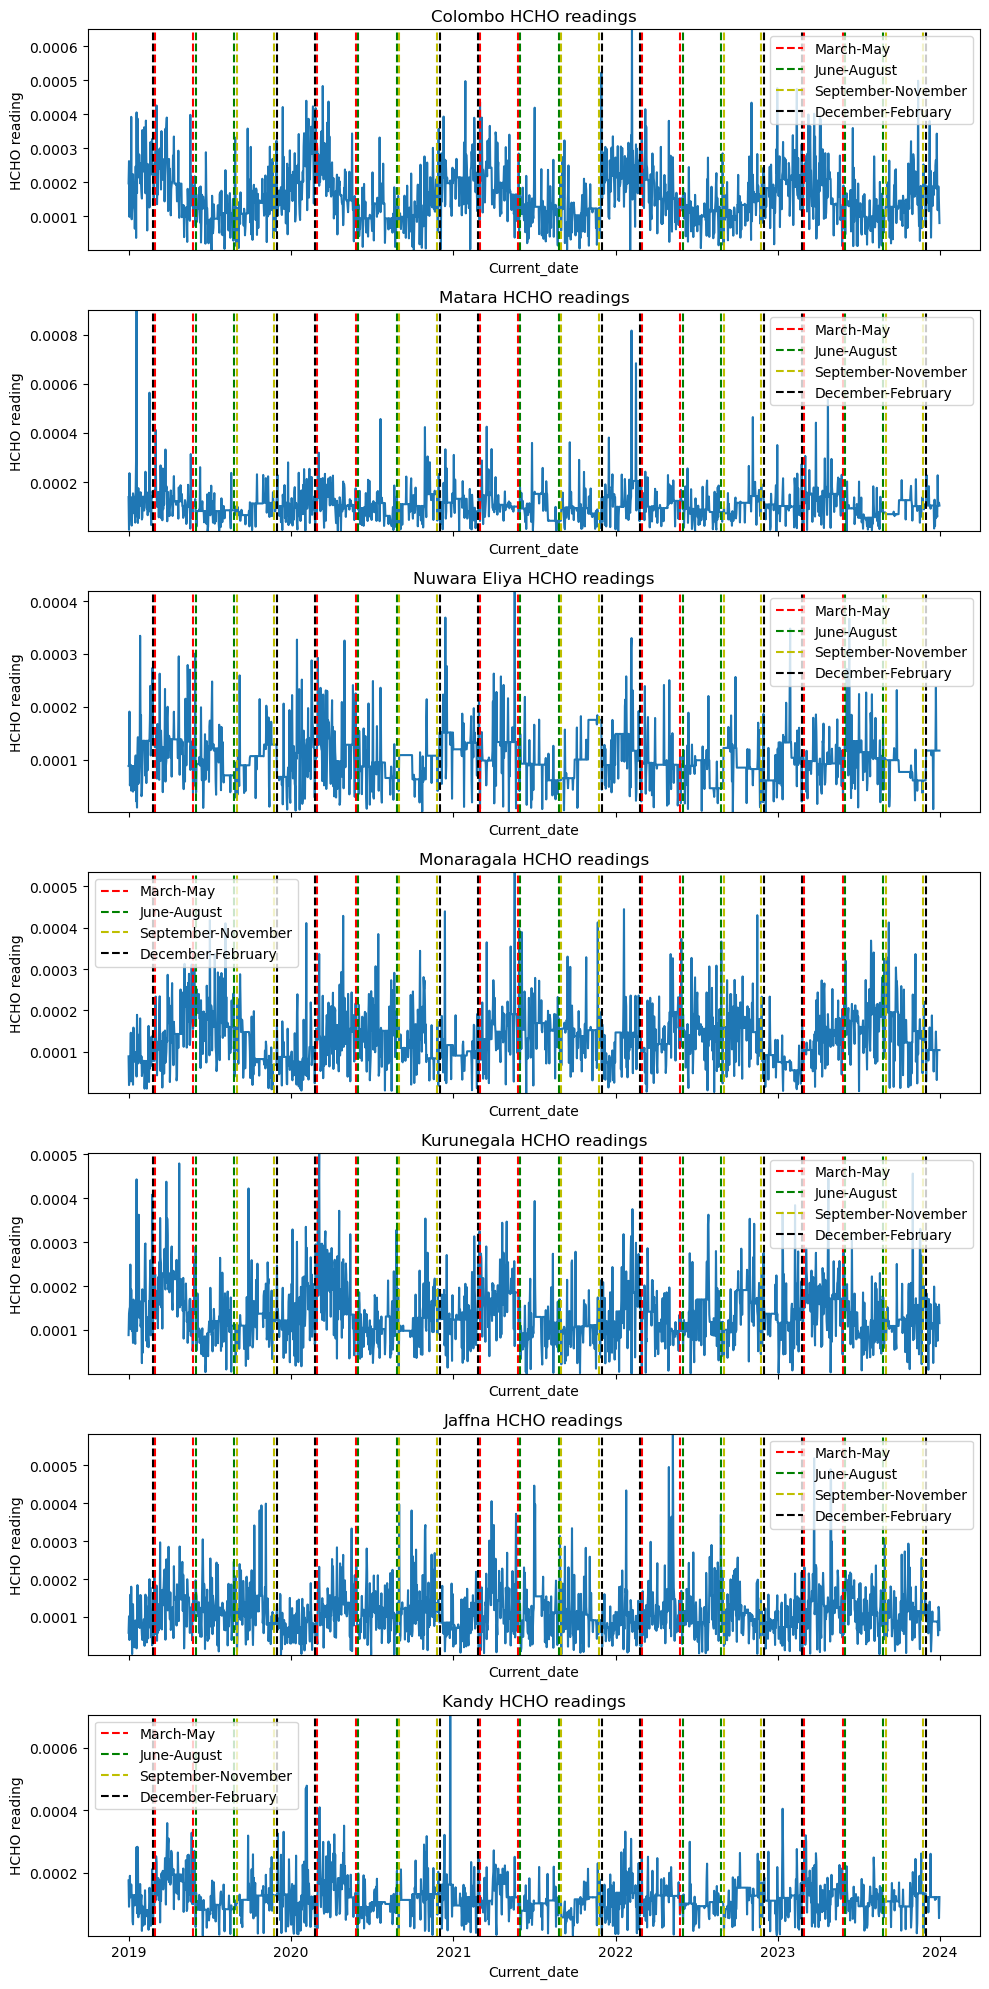

In [91]:
seasons = ["March-May", "June-August", "September-November", "December-February"]
colors = ["r", "g", "y", "k"]
dates = [("03-01","05-27"), ("06-01","08-27"), ("09-01","11-25"), ("12-01","02-25")]
fig, axes = plt.subplots(nrows=len(locations), ncols=1, figsize=(10, 20), sharex=True)
print(axes)
print(zip(locations, axes))
x = 0
for (location, ax) in zip(locations, axes):
    sub_df = df[df["Location"] == location]
    x = sub_df["Current_date"]
    y = sub_df["HCHO reading"]
    
    # Plot data on the current Axes object
    ax.plot(x, y)

    # Get the range of y-values
    y_min = min(y)
    y_max = max(y)

    # Set the y-axis limits based on the range of y-values
    ax.set_ylim(y_min, y_max)

    # Add lines in the y-axis
    for year in years:
        for i in range(4):
            season_start, season_end = dates[i]
            if dates[i] == ("12-01","02-28"):
                ax.axvline(x=datetime.strptime(str(year)+"-"+season_start, '%Y-%m-%d'), color=colors[i], linestyle='--')
                ax.axvline(x=datetime.strptime(str(year+1)+"-"+season_end, '%Y-%m-%d'), color=colors[i], linestyle='--')
            else:
                ax.axvline(x=datetime.strptime(str(year)+"-"+season_start, '%Y-%m-%d'), color=colors[i], linestyle='--')
                ax.axvline(x=datetime.strptime(str(year)+"-"+season_end, '%Y-%m-%d'), color=colors[i], linestyle='--')
    
    # Add labels and title
    ax.set_xlabel('Current_date')
    ax.set_ylabel('HCHO reading')
    ax.set_title(f'{location} HCHO readings')
    lines = []
    for s in range(4):
        line = plt.Line2D([], [], color=colors[s], linestyle='--', label=seasons[s])
        lines.append(line)
    ax.legend(handles=lines) 

# Adjust layout and show the plot
plt.tight_layout()
plt.show()




In [269]:

# Convert the "time" column to datetime format


# Filter the DataFrame to include only rows with dates after December 31, 2018
weather_df = weather_df[(weather_df["time"] > '2018-12-31') & (weather_df["city"] == "Colombo")]
weather_df = weather_df.reset_index(drop=True)

print(weather_df.head())
print(weather_df["city"].describe())
print(colombo_df.count())

KeyError: 'time'

In [92]:
columns_to_import = ['NAME', 'ELEVATION', 'DATE', 'PRCP', 'TAVG']
custom_column_names = ['Location', 'Elevation', 'Current_date', 'Precipitation', 'Temperature_average']
weather_df = pd.read_csv("3612007.csv", usecols=columns_to_import)
weather_df.columns = custom_column_names
weather_df["Current_date"] = pd.to_datetime(weather_df["Current_date"])
print(weather_df.isna().sum())
weather_df.loc[weather_df["Location"] == "COLOMBO, CE", "Location"] = "Colombo"
weather_df.loc[weather_df["Location"] == "NUWARA ELIYA, CE","Location"] = "Nuwara Eliya"
weather_df.loc[weather_df["Location"] == "KURUNEGALA, CE","Location"] = "Kurunegala"

Location                0
Elevation               0
Current_date            0
Precipitation          17
Temperature_average     0
dtype: int64


In [58]:
weather_locations = weather_df["Location"].unique()
print(weather_locations)
print(weather_df.head())
for location in weather_locations:
    for year in years:
        for month in range (1,13):
            print(location)
            filtered = weather_df.loc[(weather_df["Location"] == location) & (weather_df['Current_date'].dt.month == month) & (weather_df['Current_date'].dt.year == year), "Precipitation"]
            print(filtered)
            print(filtered.mean())
            weather_df.loc[(weather_df["Location"] == location) & 
                   (weather_df['Current_date'].dt.month == month) & 
                   (weather_df['Current_date'].dt.year == year) & 
                   (weather_df['Precipitation'].isna()), "Precipitation"] = filtered.mean()
            corrected = weather_df.loc[(weather_df["Location"] == location) & (weather_df['Current_date'].dt.month == month) & (weather_df['Current_date'].dt.year == year), "Precipitation"]
            print(corrected)
print(weather_df.isna().sum())
print(weather_df[weather_df["Location"] == "Kurunegala"].count())
date_range = pd.date_range(start='2019-01-01', end='2023-12-31')
print(len(date_range))
# Check if each date in the date range exists in the DataFrame
missing_dates = date_range[~date_range.isin(weather_df['Current_date'])]
print(missing_dates)
print(weather_df.count())


['Kurunegala' 'Colombo' 'Nuwara Eliya']
     Location  Elevation Current_date  Precipitation  Temperature_average
0  Kurunegala      116.0   2019-01-02            0.0                   78
1  Kurunegala      116.0   2019-01-03            0.0                   81
2  Kurunegala      116.0   2019-01-04            0.0                   83
3  Kurunegala      116.0   2019-01-05            0.0                   84
4  Kurunegala      116.0   2019-01-06            0.0                   82
Kurunegala
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
Name: Precipitation, dtype: float64
0.0
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18   

575    0.23
576    0.00
577    0.00
578    0.00
579    0.00
580    0.00
581    0.00
582    0.00
583    0.00
584    0.11
585    0.39
586    0.03
587    0.00
588    0.47
589    0.74
590    0.09
591    0.00
592    0.00
593    0.00
594    0.00
595    0.08
596    0.15
597    0.00
598    0.01
599    0.00
600    0.00
601    0.00
602    0.00
603    0.00
604    0.03
605    0.00
Name: Precipitation, dtype: float64
Kurunegala
606    0.00
607    0.00
608    0.00
609    0.22
610    1.59
611    1.02
612    0.43
613    0.00
614    0.68
615    0.54
616    0.00
617    0.35
618    0.18
619    0.62
620    0.06
621    0.11
622    0.00
623    1.74
624    1.62
625    0.00
626    0.04
627    0.00
628    0.00
629    0.26
630    0.32
631    0.03
632    0.00
633    0.00
634    0.00
635    0.00
Name: Precipitation, dtype: float64
0.327
606    0.00
607    0.00
608    0.00
609    0.22
610    1.59
611    1.02
612    0.43
613    0.00
614    0.68
615    0.54
616    0.00
617    0.35
618    0.18
619    0.62
620    0.06

1225    1.75
1226    0.27
1227    0.03
1228    0.03
1229    0.00
1230    5.47
1231    0.05
1232    0.10
1233    0.00
1234    0.00
1235    0.00
1236    0.00
1237    0.00
1238    0.00
1239    0.00
1240    0.00
1241    0.00
1242    0.00
1243    0.00
1244    0.00
1245    0.10
1246    0.00
1247    0.00
1248    0.00
1249    0.20
Name: Precipitation, dtype: float64
Kurunegala
1250    0.44
1251    0.22
1252    0.10
1253    0.00
1254    0.00
1255    0.00
1256    0.00
1257    0.00
1258    0.00
1259    0.00
1260    0.00
1261    0.42
1262    0.00
1263    0.43
1264    1.19
1265    0.06
1266    0.59
1267    1.45
1268    0.43
1269    0.04
1270    4.22
1271    0.89
1272    0.41
1273    1.13
1274    0.14
1275    0.00
1276    0.00
1277    0.00
1278    0.00
1279    0.00
1280    0.03
Name: Precipitation, dtype: float64
0.39322580645161287
1250    0.44
1251    0.22
1252    0.10
1253    0.00
1254    0.00
1255    0.00
1256    0.00
1257    0.00
1258    0.00
1259    0.00
1260    0.00
1261    0.42
1262    0.00


1938    0.43
1939    1.76
1940    0.04
1941    0.08
1942    0.13
1943    0.17
1944    0.00
1945    0.00
1946    0.00
1947    0.00
1948    0.07
1949    2.29
1950    0.04
1951    0.09
1952    1.07
1953    4.42
1954    0.09
1955    0.18
1956    0.26
1957    0.42
1958    0.02
1959    0.37
1960    0.23
1961    4.96
1962    3.50
1963    0.14
1964    0.00
1965    0.06
1966    1.33
1967    0.00
Name: Precipitation, dtype: float64
Colombo
1968    0.45
1969    0.59
1970    0.00
1971    0.13
1972    0.01
1973    0.02
1974    0.95
1975    1.04
1976    0.00
1977    0.00
1978    0.07
1979    0.22
1980    0.11
1981    0.63
1982    0.10
1983    1.53
1984    0.14
1985    0.00
1986    0.20
1987    0.65
1988    1.30
1989    0.83
1990    0.07
1991    0.54
1992    0.21
1993    0.02
1994    0.01
1995    0.67
1996    0.17
1997    0.38
1998    0.35
Name: Precipitation, dtype: float64
0.36741935483870974
1968    0.45
1969    0.59
1970    0.00
1971    0.13
1972    0.01
1973    0.02
1974    0.95
1975    1.04
197

2694    0.00
2695    1.50
2696    0.16
2697    0.00
2698    0.27
2699    1.76
2700    0.00
2701    0.02
2702    0.05
2703    0.14
2704    0.46
2705    0.04
2706    0.10
2707    0.06
2708    0.00
2709    0.08
2710    0.07
2711    0.05
2712    0.04
2713    0.12
2714    2.01
2715    0.02
2716    0.09
2717    0.32
2718    0.07
2719    0.44
2720    0.75
2721    0.91
2722    0.37
2723    0.36
2724    0.73
Name: Precipitation, dtype: float64
0.3545161290322581
2694    0.00
2695    1.50
2696    0.16
2697    0.00
2698    0.27
2699    1.76
2700    0.00
2701    0.02
2702    0.05
2703    0.14
2704    0.46
2705    0.04
2706    0.10
2707    0.06
2708    0.00
2709    0.08
2710    0.07
2711    0.05
2712    0.04
2713    0.12
2714    2.01
2715    0.02
2716    0.09
2717    0.32
2718    0.07
2719    0.44
2720    0.75
2721    0.91
2722    0.37
2723    0.36
2724    0.73
Name: Precipitation, dtype: float64
Colombo
2725    1.52
2726    0.46
2727    0.00
2728    0.56
2729    0.22
2730    0.95
2731    0.83
2732

3379    1.20
3380    1.75
3381    1.07
3382    2.59
3383    1.27
3384    0.30
3385    2.18
3386    0.11
3387    0.00
3388    0.00
3389    1.47
3390    0.22
3391    0.00
3392    0.00
3393    1.48
3394    0.00
3395    1.86
3396    0.00
3397    1.78
3398    0.22
3399    0.45
3400    1.30
3401    0.55
3402    0.00
3403    0.01
3404    0.01
3405    0.11
3406    0.08
3407    0.41
3408    0.85
3409    1.14
Name: Precipitation, dtype: float64
0.7229032258064517
3379    1.20
3380    1.75
3381    1.07
3382    2.59
3383    1.27
3384    0.30
3385    2.18
3386    0.11
3387    0.00
3388    0.00
3389    1.47
3390    0.22
3391    0.00
3392    0.00
3393    1.48
3394    0.00
3395    1.86
3396    0.00
3397    1.78
3398    0.22
3399    0.45
3400    1.30
3401    0.55
3402    0.00
3403    0.01
3404    0.01
3405    0.11
3406    0.08
3407    0.41
3408    0.85
3409    1.14
Name: Precipitation, dtype: float64
Colombo
3410    3.63
3411    0.29
3412    0.30
3413    0.02
3414    0.81
3415    0.26
3416    3.35
3417

3977    0.00
3978    0.00
3979    0.00
3980    0.00
3981    0.00
3982    0.02
3983    0.31
3984    0.69
3985    0.00
3986    0.00
3987    0.45
3988    0.57
3989    0.03
3990    0.19
3991    0.16
3992    0.00
3993    0.00
3994    0.00
3995    0.00
3996    0.23
3997    0.00
3998    0.07
3999    0.00
4000    0.00
4001    0.36
4002    0.74
4003    0.06
4004    0.00
4005    0.01
4006    0.16
Name: Precipitation, dtype: float64
Nuwara Eliya
4007    0.01
4008    0.00
4009    0.30
4010    0.01
4011    0.03
4012    0.00
4013    0.17
4014    0.00
4015    0.54
4016    0.07
4017    0.01
4018    0.02
4019    0.02
4020    0.00
4021    0.00
4022    0.02
4023    0.17
4024    0.00
4025    0.99
4026    0.11
4027    0.13
4028    0.00
4029    0.01
4030    0.03
4031    0.01
4032    0.01
4033    0.00
4034    0.04
4035    0.56
4036    0.21
4037    0.17
Name: Precipitation, dtype: float64
0.11741935483870966
4007    0.01
4008    0.00
4009    0.30
4010    0.01
4011    0.03
4012    0.00
4013    0.17
4014    0.0

4633    0.09
4634    0.00
4635    0.00
4636    0.00
4637    0.00
4638    0.00
4639    0.00
4640    0.00
4641    0.00
4642    0.46
4643    0.11
4644    0.74
4645    0.63
4646    0.80
4647    0.43
4648    0.40
4649    0.52
4650    0.48
4651    0.13
4652    0.07
4653    0.04
4654    0.00
4655    0.04
4656    0.19
4657    0.00
4658    0.04
4659    0.01
4660    0.18
4661    0.22
4662    0.63
Name: Precipitation, dtype: float64
Nuwara Eliya
4663    0.42
4664    0.03
4665    0.15
4666    0.00
4667    0.00
4668    0.00
4669    0.03
4670    0.00
4671    0.01
4672    0.00
4673    0.00
4674    0.00
4675    0.00
4676    0.00
4677    0.24
4678    0.13
4679    0.20
4680    0.00
4681    0.03
4682    0.00
4683    0.00
4684    0.00
4685    0.00
4686    0.00
4687    0.10
4688    0.09
4689    0.00
4690    0.00
4691    0.00
4692    0.12
Name: Precipitation, dtype: float64
0.05166666666666667
4663    0.42
4664    0.03
4665    0.15
4666    0.00
4667    0.00
4668    0.00
4669    0.03
4670    0.00
4671    0.0

In [93]:
dfs = []
for location in weather_locations:
    merged_df = pd.merge(df[df["Location"] == location], weather_df[weather_df["Location"] == location], on='Current_date', how='left')    
    dfs.append(merged_df)
complete_df = pd.concat(dfs, ignore_index=True)
complete_df.drop(columns=['Location_y'], inplace=True)
complete_df.rename(columns={'Location_x': 'Location'}, inplace=True)
na_counts = complete_df.isna().sum()
print(na_counts)
print(complete_df[complete_df["Location"] == "Colombo"].count())

HCHO reading             0
Location                 0
Current_date             0
Next_date                0
Elevation              248
Precipitation          265
Temperature_average    248
dtype: int64
HCHO reading           1826
Location               1826
Current_date           1826
Next_date              1826
Elevation              1765
Precipitation          1756
Temperature_average    1765
dtype: int64


In [95]:
na_counts = complete_df.isna().sum()
print(na_counts)
print(complete_df[complete_df.isnull().any(axis=1)])

HCHO reading           0
Location               0
Current_date           0
Next_date              0
Elevation              0
Precipitation          0
Temperature_average    0
dtype: int64
Empty DataFrame
Columns: [HCHO reading, Location, Current_date, Next_date, Elevation, Precipitation, Temperature_average]
Index: []


In [94]:
weather_locations = complete_df["Location"].unique()
print(complete_df)
print(complete_df.head())
columns = ["Elevation", "Precipitation", "Temperature_average"]
for location in weather_locations:
    for year in years:
        for month in range (1,13):
            for column in columns:
                print(location)
                print(year, "/", month)
                filtered = complete_df.loc[(complete_df["Location"] == location) & (complete_df['Current_date'].dt.month == month) & (complete_df['Current_date'].dt.year == year), column]
                print(filtered)
                print(filtered.mean())
                complete_df.loc[(complete_df["Location"] == location) & 
                       (complete_df['Current_date'].dt.month == month) & 
                       (complete_df['Current_date'].dt.year == year) & 
                       (complete_df[column].isna()), column] = filtered.mean()
                corrected = complete_df.loc[(complete_df["Location"] == location) & (complete_df['Current_date'].dt.month == month) & (complete_df['Current_date'].dt.year == year), column]
                print(corrected)
print(complete_df.isna().sum())


      HCHO reading      Location Current_date  Next_date  Elevation  \
0         0.000088    Kurunegala   2019-01-01 2019-01-02        NaN   
1         0.000137    Kurunegala   2019-01-02 2019-01-03      116.0   
2         0.000148    Kurunegala   2019-01-03 2019-01-04      116.0   
3         0.000152    Kurunegala   2019-01-04 2019-01-05      116.0   
4         0.000249    Kurunegala   2019-01-05 2019-01-06      116.0   
...            ...           ...          ...        ...        ...   
5473      0.000117  Nuwara Eliya   2023-12-27 2023-12-28     1880.0   
5474      0.000117  Nuwara Eliya   2023-12-28 2023-12-29     1880.0   
5475      0.000117  Nuwara Eliya   2023-12-29 2023-12-30     1880.0   
5476      0.000117  Nuwara Eliya   2023-12-30 2023-12-31     1880.0   
5477      0.000117  Nuwara Eliya   2023-12-31 2024-01-01     1880.0   

      Precipitation  Temperature_average  
0               NaN                  NaN  
1              0.00                 78.0  
2              0.0

243    116.0
244    116.0
245    116.0
246    116.0
247    116.0
248    116.0
249    116.0
250    116.0
251    116.0
252    116.0
253    116.0
254    116.0
255    116.0
256    116.0
257    116.0
258    116.0
259    116.0
260    116.0
261    116.0
262    116.0
263    116.0
264    116.0
265    116.0
266    116.0
267    116.0
268    116.0
269    116.0
270    116.0
271    116.0
272    116.0
Name: Elevation, dtype: float64
Kurunegala
2019 / 9
243    0.28
244    0.14
245    0.02
246    0.00
247    0.23
248    0.98
249    0.06
250    0.00
251    0.00
252    0.00
253    0.00
254    0.48
255    0.00
256    0.00
257    0.39
258    0.95
259    0.47
260    0.39
261    0.13
262    0.11
263     NaN
264    0.00
265    0.05
266    0.98
267     NaN
268     NaN
269     NaN
270    0.00
271    0.02
272    0.00
Name: Precipitation, dtype: float64
0.21846153846153846
243    0.280000
244    0.140000
245    0.020000
246    0.000000
247    0.230000
248    0.980000
249    0.060000
250    0.000000
251    0.00000

486    1.15
487    0.08
488    0.00
489    0.20
490    0.00
491    1.26
492    0.13
493    1.08
494    0.03
495    2.09
496    1.08
497    0.16
498    0.00
499    0.02
500    0.76
501    3.54
502    0.00
503    1.47
504    0.12
505    0.00
506    0.04
507    1.76
508    0.00
509    0.02
510    0.00
511    0.00
512    0.00
513    0.00
514    0.05
515    0.00
516    0.00
Name: Precipitation, dtype: float64
Kurunegala
2020 / 5
486    81.0
487    87.0
488    85.0
489    85.0
490    83.0
491    81.0
492    83.0
493    84.0
494    83.0
495    82.0
496    82.0
497    84.0
498    84.0
499    86.0
500    81.0
501    83.0
502    85.0
503    83.0
504    83.0
505    85.0
506    81.0
507    83.0
508    85.0
509    85.0
510    85.0
511    85.0
512    83.0
513    85.0
514    83.0
515    85.0
516    86.0
Name: Temperature_average, dtype: float64
83.74193548387096
486    81.0
487    87.0
488    85.0
489    85.0
490    83.0
491    81.0
492    83.0
493    84.0
494    83.0
495    82.0
496    82.0
497    8

731    0.02
732    0.02
733    0.00
734    0.42
735    0.59
736    0.18
737    3.27
738    0.00
739    0.50
740    0.10
741    0.66
742    0.00
743    0.00
744    0.20
745    0.27
746    0.00
747    0.00
748    0.00
749    0.00
750    0.01
751    0.01
752    0.00
753    0.00
754    0.00
755    0.00
756    0.00
757    0.00
758    0.00
759    0.00
760    0.00
761    0.00
Name: Precipitation, dtype: float64
Kurunegala
2021 / 1
731    76.0
732    80.0
733    80.0
734    78.0
735    80.0
736    79.0
737    79.0
738    81.0
739    75.0
740    78.0
741    76.0
742    78.0
743    79.0
744    79.0
745    77.0
746    80.0
747    80.0
748    76.0
749    80.0
750    82.0
751    83.0
752    83.0
753    80.0
754    79.0
755    79.0
756    79.0
757    79.0
758    81.0
759    79.0
760    81.0
761    82.0
Name: Temperature_average, dtype: float64
79.29032258064517
731    76.0
732    80.0
733    80.0
734    78.0
735    80.0
736    79.0
737    79.0
738    81.0
739    75.0
740    78.0
741    76.0
742    7

943    82.000000
944    82.000000
945    81.000000
946    83.000000
947    83.000000
948    81.000000
949    81.000000
950    80.000000
951    80.000000
952    82.000000
953    82.000000
954    80.000000
955    82.000000
956    81.000000
957    81.000000
958    81.000000
959    82.000000
960    79.000000
961    82.000000
962    83.000000
963    80.000000
964    80.000000
965    80.966667
966    80.000000
967    80.000000
968    78.000000
969    81.000000
970    80.000000
971    79.000000
972    81.000000
973    82.000000
Name: Temperature_average, dtype: float64
Kurunegala
2021 / 9
974     116.0
975     116.0
976     116.0
977     116.0
978     116.0
979     116.0
980     116.0
981     116.0
982     116.0
983     116.0
984     116.0
985     116.0
986     116.0
987     116.0
988     116.0
989     116.0
990     116.0
991     116.0
992     116.0
993     116.0
994     116.0
995     116.0
996     116.0
997     116.0
998     116.0
999     116.0
1000    116.0
1001    116.0
1002    116.0
1003 

1216    116.0
1217    116.0
1218    116.0
1219    116.0
1220    116.0
1221    116.0
1222    116.0
1223    116.0
1224    116.0
1225    116.0
1226    116.0
1227    116.0
1228    116.0
1229    116.0
1230    116.0
1231    116.0
1232    116.0
1233    116.0
1234    116.0
1235    116.0
1236    116.0
1237    116.0
1238    116.0
1239    116.0
1240    116.0
1241    116.0
1242    116.0
1243    116.0
1244    116.0
1245    116.0
1246    116.0
Name: Elevation, dtype: float64
Kurunegala
2022 / 5
1216    0.00
1217    0.00
1218    0.00
1219    0.00
1220    0.00
1221    0.00
1222    0.00
1223    0.00
1224    0.00
1225    0.09
1226     NaN
1227     NaN
1228    1.01
1229    0.47
1230    1.09
1231    0.05
1232    0.19
1233    0.06
1234    0.55
1235    0.69
1236    0.02
1237    0.15
1238    0.00
1239    0.01
1240    1.76
1241    0.11
1242    0.47
1243    0.08
1244    0.78
1245    0.25
1246    0.82
Name: Precipitation, dtype: float64
0.2982758620689655
1216    0.000000
1217    0.000000
1218    0.000000
1219 

1430    116.0
1431    116.0
1432    116.0
1433    116.0
1434    116.0
1435    116.0
1436    116.0
1437    116.0
1438    116.0
1439    116.0
1440    116.0
1441    116.0
1442    116.0
1443    116.0
1444    116.0
1445    116.0
1446    116.0
1447    116.0
1448    116.0
1449    116.0
1450    116.0
1451    116.0
1452    116.0
1453    116.0
1454    116.0
1455    116.0
1456    116.0
1457    116.0
1458    116.0
1459    116.0
1460    116.0
Name: Elevation, dtype: float64
Kurunegala
2022 / 12
1430    0.00
1431    0.09
1432    0.00
1433    0.00
1434    0.25
1435    0.02
1436    0.00
1437    0.06
1438    0.38
1439    0.06
1440    0.17
1441    0.00
1442    0.00
1443    0.00
1444    0.00
1445    0.00
1446     NaN
1447    0.28
1448    2.21
1449    0.11
1450    0.41
1451    0.38
1452    0.54
1453    0.23
1454    3.43
1455    0.07
1456    2.22
1457    0.02
1458    0.00
1459    0.00
1460    0.00
Name: Precipitation, dtype: float64
0.36433333333333334
1430    0.000000
1431    0.090000
1432    0.000000
143

1673    116.0
1674    116.0
1675    116.0
1676    116.0
1677    116.0
1678    116.0
1679    116.0
1680    116.0
1681    116.0
1682    116.0
1683    116.0
1684    116.0
1685    116.0
1686    116.0
1687    116.0
1688    116.0
1689    116.0
1690    116.0
1691    116.0
1692    116.0
1693    116.0
1694    116.0
1695    116.0
1696    116.0
1697    116.0
1698    116.0
1699    116.0
1700    116.0
1701    116.0
1702    116.0
1703    116.0
Name: Elevation, dtype: float64
116.0
1673    116.0
1674    116.0
1675    116.0
1676    116.0
1677    116.0
1678    116.0
1679    116.0
1680    116.0
1681    116.0
1682    116.0
1683    116.0
1684    116.0
1685    116.0
1686    116.0
1687    116.0
1688    116.0
1689    116.0
1690    116.0
1691    116.0
1692    116.0
1693    116.0
1694    116.0
1695    116.0
1696    116.0
1697    116.0
1698    116.0
1699    116.0
1700    116.0
1701    116.0
1702    116.0
1703    116.0
Name: Elevation, dtype: float64
Kurunegala
2023 / 8
1673    0.00
1674    0.00
1675    0.00
167

1916    7.0
1917    7.0
1918    7.0
1919    7.0
1920    7.0
1921    7.0
1922    7.0
1923    7.0
1924    7.0
1925    7.0
1926    7.0
1927    7.0
1928    7.0
1929    7.0
1930    7.0
1931    7.0
1932    7.0
1933    7.0
1934    7.0
1935    7.0
1936    7.0
1937    7.0
1938    NaN
1939    7.0
1940    7.0
1941    7.0
1942    7.0
1943    7.0
1944    NaN
1945    7.0
Name: Elevation, dtype: float64
7.0
1916    7.0
1917    7.0
1918    7.0
1919    7.0
1920    7.0
1921    7.0
1922    7.0
1923    7.0
1924    7.0
1925    7.0
1926    7.0
1927    7.0
1928    7.0
1929    7.0
1930    7.0
1931    7.0
1932    7.0
1933    7.0
1934    7.0
1935    7.0
1936    7.0
1937    7.0
1938    7.0
1939    7.0
1940    7.0
1941    7.0
1942    7.0
1943    7.0
1944    7.0
1945    7.0
Name: Elevation, dtype: float64
Colombo
2019 / 4
1916    0.00
1917    0.00
1918    0.00
1919    0.00
1920    0.00
1921    0.00
1922    0.00
1923    0.00
1924    0.00
1925    0.00
1926    0.00
1927    0.00
1928    0.19
1929    0.00
1930    0.64


2160    7.0
2161    7.0
2162    7.0
2163    7.0
2164    7.0
2165    7.0
2166    7.0
2167    7.0
2168    7.0
2169    7.0
2170    7.0
2171    7.0
2172    7.0
2173    7.0
2174    7.0
2175    7.0
2176    7.0
2177    7.0
2178    7.0
2179    7.0
2180    7.0
2181    7.0
2182    7.0
2183    7.0
2184    7.0
2185    7.0
2186    7.0
2187    7.0
2188    7.0
2189    7.0
2190    7.0
Name: Elevation, dtype: float64
7.0
2160    7.0
2161    7.0
2162    7.0
2163    7.0
2164    7.0
2165    7.0
2166    7.0
2167    7.0
2168    7.0
2169    7.0
2170    7.0
2171    7.0
2172    7.0
2173    7.0
2174    7.0
2175    7.0
2176    7.0
2177    7.0
2178    7.0
2179    7.0
2180    7.0
2181    7.0
2182    7.0
2183    7.0
2184    7.0
2185    7.0
2186    7.0
2187    7.0
2188    7.0
2189    7.0
2190    7.0
Name: Elevation, dtype: float64
Colombo
2019 / 12
2160    1.50
2161    0.01
2162    0.00
2163    0.00
2164    3.23
2165    0.42
2166    0.00
2167    0.20
2168    0.00
2169    0.00
2170    2.24
2171    0.00
2172    0.00
2

2404    7.0
2405    7.0
2406    7.0
2407    7.0
2408    7.0
2409    7.0
2410    7.0
2411    7.0
2412    7.0
2413    7.0
2414    7.0
2415    7.0
2416    7.0
2417    7.0
2418    7.0
2419    7.0
2420    7.0
2421    7.0
2422    7.0
2423    7.0
2424    7.0
2425    7.0
2426    7.0
2427    7.0
2428    7.0
2429    7.0
2430    7.0
2431    7.0
2432    7.0
2433    7.0
2434    7.0
Name: Elevation, dtype: float64
Colombo
2020 / 8
2404    0.12
2405    1.24
2406    0.45
2407    0.01
2408    0.31
2409    1.07
2410    0.71
2411    0.00
2412    0.00
2413    0.00
2414    0.02
2415    0.00
2416    0.00
2417    0.00
2418    0.00
2419    0.00
2420    0.00
2421    0.00
2422    0.00
2423    0.00
2424    0.00
2425    0.02
2426    0.00
2427    0.00
2428    0.01
2429    0.00
2430    0.00
2431    0.00
2432    0.00
2433    0.00
2434    0.00
Name: Precipitation, dtype: float64
0.12774193548387097
2404    0.12
2405    1.24
2406    0.45
2407    0.01
2408    0.31
2409    1.07
2410    0.71
2411    0.00
2412    0.00
241

2647    0.00
2648    0.00
2649    0.00
2650    0.00
2651    0.00
2652    0.00
2653    0.01
2654    0.00
2655    0.42
2656    0.05
2657    0.00
2658    0.01
2659    0.33
2660    0.01
2661    0.00
2662    0.00
2663    0.00
2664    0.04
2665    1.44
2666    0.69
2667    0.60
2668    0.00
2669    2.30
2670    1.92
2671    1.10
2672    0.04
2673    0.00
2674    0.00
2675    0.01
2676    3.86
Name: Precipitation, dtype: float64
Colombo
2021 / 4
2647    86.0
2648    86.0
2649    85.0
2650    84.0
2651    85.0
2652    85.0
2653    83.0
2654    84.0
2655    84.0
2656    83.0
2657    83.0
2658    83.0
2659    83.0
2660    83.0
2661    83.0
2662    86.0
2663    83.0
2664    81.0
2665    85.0
2666    83.0
2667    84.0
2668    85.0
2669    79.0
2670    81.0
2671    83.0
2672    85.0
2673    85.0
2674    86.0
2675    85.0
2676    82.0
Name: Temperature_average, dtype: float64
83.76666666666667
2647    86.0
2648    86.0
2649    85.0
2650    84.0
2651    85.0
2652    85.0
2653    83.0
2654    84.0
265

2922    7.0
2923    7.0
2924    7.0
2925    7.0
2926    NaN
2927    7.0
2928    7.0
2929    7.0
2930    7.0
2931    7.0
2932    NaN
2933    NaN
2934    7.0
2935    7.0
2936    NaN
2937    7.0
2938    7.0
2939    NaN
2940    7.0
2941    NaN
2942    7.0
2943    7.0
2944    NaN
2945    7.0
2946    NaN
2947    7.0
2948    NaN
2949    7.0
2950    NaN
2951    7.0
2952    7.0
Name: Elevation, dtype: float64
7.0
2922    7.0
2923    7.0
2924    7.0
2925    7.0
2926    7.0
2927    7.0
2928    7.0
2929    7.0
2930    7.0
2931    7.0
2932    7.0
2933    7.0
2934    7.0
2935    7.0
2936    7.0
2937    7.0
2938    7.0
2939    7.0
2940    7.0
2941    7.0
2942    7.0
2943    7.0
2944    7.0
2945    7.0
2946    7.0
2947    7.0
2948    7.0
2949    7.0
2950    7.0
2951    7.0
2952    7.0
Name: Elevation, dtype: float64
Colombo
2022 / 1
2922    0.01
2923    0.00
2924    0.30
2925    0.29
2926     NaN
2927    0.00
2928    0.00
2929    0.00
2930    0.00
2931    0.01
2932     NaN
2933     NaN
2934    0.00
29

3165    7.0
3166    7.0
3167    7.0
3168    7.0
3169    7.0
3170    7.0
3171    7.0
3172    7.0
3173    7.0
3174    7.0
3175    7.0
3176    7.0
3177    7.0
3178    NaN
3179    7.0
3180    NaN
3181    NaN
3182    NaN
3183    NaN
3184    NaN
3185    7.0
3186    7.0
3187    7.0
3188    7.0
3189    7.0
3190    7.0
3191    7.0
3192    7.0
3193    7.0
3194    7.0
Name: Elevation, dtype: float64
7.0
3165    7.0
3166    7.0
3167    7.0
3168    7.0
3169    7.0
3170    7.0
3171    7.0
3172    7.0
3173    7.0
3174    7.0
3175    7.0
3176    7.0
3177    7.0
3178    7.0
3179    7.0
3180    7.0
3181    7.0
3182    7.0
3183    7.0
3184    7.0
3185    7.0
3186    7.0
3187    7.0
3188    7.0
3189    7.0
3190    7.0
3191    7.0
3192    7.0
3193    7.0
3194    7.0
Name: Elevation, dtype: float64
Colombo
2022 / 9
3165    1.35
3166    0.05
3167    0.10
3168    0.14
3169    0.00
3170    0.49
3171    0.11
3172    0.00
3173    0.00
3174    0.00
3175    0.00
3176    0.00
3177    0.00
3178     NaN
3179    0.00


3377    0.00
3378    0.02
3379    0.00
3380    0.13
3381    0.05
3382    0.00
3383    0.00
3384    1.98
3385    0.00
3386    0.00
3387    0.31
3388    0.00
3389    0.00
3390    0.20
3391    1.09
3392    0.89
3393    0.00
3394    0.00
3395    0.00
3396    0.00
3397    0.00
3398    0.42
3399    0.00
3400    0.00
3401    0.02
3402    1.96
3403    0.70
3404    0.30
3405    0.14
3406    1.91
Name: Precipitation, dtype: float64
Colombo
2023 / 4
3377    83.0
3378    83.0
3379    82.0
3380    81.0
3381    83.0
3382    83.0
3383    83.0
3384    81.0
3385    83.0
3386    83.0
3387    85.0
3388    85.0
3389    84.0
3390    83.0
3391    83.0
3392    83.0
3393    84.0
3394    86.0
3395    86.0
3396    86.0
3397    86.0
3398    84.0
3399    85.0
3400    83.0
3401    82.0
3402    81.0
3403    83.0
3404    82.0
3405    79.0
3406    82.0
Name: Temperature_average, dtype: float64
83.23333333333333
3377    83.0
3378    83.0
3379    82.0
3380    81.0
3381    83.0
3382    83.0
3383    83.0
3384    81.0
338

3591    81.0
3592    82.0
3593    80.0
3594    80.0
3595    80.0
3596    80.0
3597    78.0
3598    81.0
3599    80.0
3600    81.0
3601    83.0
3602    81.0
3603    81.0
3604    82.0
3605    82.0
3606    84.0
3607    83.0
3608    82.0
3609    80.0
3610    81.0
3611    82.0
3612    80.0
3613    82.0
3614    82.0
3615    82.0
3616    83.0
3617    83.0
3618    80.0
3619    81.0
3620    81.0
Name: Temperature_average, dtype: float64
Colombo
2023 / 12
3621    7.0
3622    7.0
3623    7.0
3624    7.0
3625    7.0
3626    7.0
3627    7.0
3628    7.0
3629    7.0
3630    7.0
3631    7.0
3632    7.0
3633    7.0
3634    7.0
3635    7.0
3636    7.0
3637    7.0
3638    7.0
3639    7.0
3640    7.0
3641    7.0
3642    7.0
3643    7.0
3644    7.0
3645    NaN
3646    NaN
3647    7.0
3648    7.0
3649    7.0
3650    7.0
3651    7.0
Name: Elevation, dtype: float64
7.0
3621    7.0
3622    7.0
3623    7.0
3624    7.0
3625    7.0
3626    7.0
3627    7.0
3628    7.0
3629    7.0
3630    7.0
3631    7.0
3632    7.

3833    63.0
3834    62.0
3835    63.0
3836    64.0
3837    61.0
3838    63.0
3839    63.0
3840    66.0
3841    64.0
3842    62.0
3843    61.0
3844    64.0
3845    60.0
3846    62.0
3847    62.0
3848    62.0
3849    61.0
3850    60.0
3851    59.0
3852    58.0
3853    59.0
3854    59.0
3855    59.0
3856    60.0
3857    61.0
3858    61.0
3859    62.0
3860    63.0
3861    62.0
3862    63.0
3863    62.0
Name: Temperature_average, dtype: float64
Nuwara Eliya
2019 / 8
3864    1880.0
3865    1880.0
3866       NaN
3867       NaN
3868    1880.0
3869    1880.0
3870    1880.0
3871    1880.0
3872    1880.0
3873    1880.0
3874    1880.0
3875    1880.0
3876    1880.0
3877    1880.0
3878    1880.0
3879    1880.0
3880    1880.0
3881    1880.0
3882    1880.0
3883    1880.0
3884    1880.0
3885    1880.0
3886    1880.0
3887    1880.0
3888    1880.0
3889    1880.0
3890    1880.0
3891    1880.0
3892    1880.0
3893    1880.0
3894    1880.0
Name: Elevation, dtype: float64
1880.0
3864    1880.0
3865    1880.0

4108    1880.0
4109    1880.0
4110    1880.0
4111    1880.0
4112    1880.0
4113    1880.0
4114    1880.0
4115    1880.0
4116    1880.0
4117    1880.0
4118    1880.0
4119    1880.0
4120    1880.0
4121    1880.0
4122    1880.0
4123    1880.0
4124    1880.0
4125    1880.0
4126    1880.0
4127    1880.0
4128    1880.0
4129    1880.0
4130    1880.0
4131    1880.0
4132    1880.0
4133    1880.0
4134    1880.0
4135    1880.0
4136    1880.0
4137    1880.0
Name: Elevation, dtype: float64
Nuwara Eliya
2020 / 4
4108    0.00
4109    0.00
4110    0.00
4111    0.00
4112    0.34
4113    0.00
4114    0.00
4115    0.00
4116    0.00
4117    0.00
4118    0.03
4119    0.00
4120    0.01
4121    0.00
4122    0.59
4123    0.18
4124    0.25
4125    0.08
4126    0.56
4127    0.15
4128    0.00
4129    0.00
4130    0.31
4131    0.07
4132    0.00
4133    0.00
4134    0.00
4135    0.08
4136    0.00
4137    0.00
Name: Precipitation, dtype: float64
0.08833333333333335
4108    0.00
4109    0.00
4110    0.00
4111    0.0

4352    60.0
4353    59.0
4354    61.0
4355    59.0
4356    60.0
4357    61.0
4358    64.0
4359    61.0
4360    61.0
4361    61.0
4362    60.0
4363    59.0
4364    58.0
4365    55.0
4366    60.0
4367    59.0
4368    60.0
4369    60.0
4370    60.0
4371    59.0
4372    59.0
4373    59.0
4374    60.0
4375    60.0
4376    58.0
4377    60.0
4378    61.0
4379    61.0
4380    63.0
4381    62.0
4382    58.0
Name: Temperature_average, dtype: float64
Nuwara Eliya
2021 / 1
4383    1880.0
4384    1880.0
4385    1880.0
4386    1880.0
4387    1880.0
4388    1880.0
4389    1880.0
4390    1880.0
4391    1880.0
4392    1880.0
4393    1880.0
4394    1880.0
4395    1880.0
4396    1880.0
4397    1880.0
4398    1880.0
4399    1880.0
4400    1880.0
4401    1880.0
4402    1880.0
4403    1880.0
4404    1880.0
4405    1880.0
4406    1880.0
4407    1880.0
4408    1880.0
4409    1880.0
4410    1880.0
4411    1880.0
4412    1880.0
4413    1880.0
Name: Elevation, dtype: float64
1880.0
4383    1880.0
4384    1880.0

4595    0.000000
4596    0.000000
4597    0.000000
4598    0.000000
4599    0.000000
4600    0.070000
4601    0.070000
4602    0.370000
4603    0.220000
4604    0.080000
4605    0.000000
4606    0.910000
4607    0.530000
4608    0.030000
4609    0.130000
4610    0.000000
4611    0.000000
4612    0.010000
4613    0.130000
4614    0.000000
4615    0.040000
4616    0.090000
4617    0.161333
4618    0.000000
4619    0.010000
4620    0.330000
4621    0.170000
4622    0.240000
4623    0.690000
4624    0.630000
4625    0.090000
Name: Precipitation, dtype: float64
Nuwara Eliya
2021 / 8
4595    62.0
4596    60.0
4597    61.0
4598    61.0
4599    61.0
4600    61.0
4601    62.0
4602    61.0
4603    61.0
4604    61.0
4605    62.0
4606    59.0
4607    62.0
4608    59.0
4609    60.0
4610    60.0
4611    60.0
4612    60.0
4613    60.0
4614    64.0
4615    60.0
4616    60.0
4617     NaN
4618    62.0
4619    61.0
4620    60.0
4621    60.0
4622    59.0
4623    59.0
4624    59.0
4625    60.0
Name: Temper

4838    1880.0
4839    1880.0
4840    1880.0
4841    1880.0
4842    1880.0
4843    1880.0
4844    1880.0
4845    1880.0
4846    1880.0
4847    1880.0
4848    1880.0
4849    1880.0
4850    1880.0
4851    1880.0
4852    1880.0
4853    1880.0
4854    1880.0
4855    1880.0
4856    1880.0
4857    1880.0
4858    1880.0
4859    1880.0
4860    1880.0
4861    1880.0
4862    1880.0
4863    1880.0
4864    1880.0
4865    1880.0
4866    1880.0
4867    1880.0
Name: Elevation, dtype: float64
Nuwara Eliya
2022 / 4
4838    0.00
4839    0.00
4840    0.48
4841    0.11
4842    1.09
4843    1.16
4844    0.34
4845    1.13
4846    0.77
4847    0.21
4848    0.09
4849    0.01
4850    0.67
4851    0.02
4852    0.04
4853    0.83
4854    0.35
4855    0.11
4856    0.00
4857    0.00
4858    0.00
4859    0.00
4860    0.59
4861    0.61
4862    0.00
4863    0.00
4864    0.00
4865    0.00
4866    0.51
4867    0.28
Name: Precipitation, dtype: float64
0.3133333333333333
4838    0.00
4839    0.00
4840    0.48
4841    0.11

5052    0.29
5053    0.16
5054    0.00
5055    0.04
5056    0.39
5057    0.70
5058    0.00
5059    0.20
5060    0.12
5061    0.02
5062    0.00
5063    0.25
5064    0.06
5065    1.02
5066    0.35
5067    0.02
5068    0.14
5069    0.00
5070    0.00
5071    0.00
5072    0.00
5073    0.00
5074    0.00
5075    0.00
5076    0.00
5077    0.00
5078    0.00
5079    0.03
5080    0.00
5081    0.00
Name: Precipitation, dtype: float64
Nuwara Eliya
2022 / 11
5052    60.0
5053    61.0
5054    61.0
5055    62.0
5056    60.0
5057    59.0
5058    61.0
5059    61.0
5060    60.0
5061    60.0
5062    61.0
5063    61.0
5064    59.0
5065    60.0
5066    59.0
5067    60.0
5068    58.0
5069    59.0
5070    58.0
5071    60.0
5072    60.0
5073    62.0
5074    60.0
5075    59.0
5076    59.0
5077    62.0
5078    60.0
5079    59.0
5080    60.0
5081    60.0
Name: Temperature_average, dtype: float64
60.03333333333333
5052    60.0
5053    61.0
5054    61.0
5055    62.0
5056    60.0
5057    59.0
5058    61.0
5059    61

5294    62.0
5295    62.0
5296    60.0
5297    59.0
5298    59.0
5299    60.0
5300    60.0
5301    62.0
5302    63.0
5303    62.0
5304    62.0
5305    63.0
5306    62.0
5307    62.0
5308    63.0
5309    64.0
5310    62.0
5311    60.0
5312    61.0
5313    60.0
5314    60.0
5315    61.0
5316    61.0
5317    60.0
5318    60.0
5319    61.0
5320    61.0
5321    64.0
5322    63.0
5323    63.0
5324    62.0
Name: Temperature_average, dtype: float64
Nuwara Eliya
2023 / 8
5325    1880.0
5326    1880.0
5327    1880.0
5328    1880.0
5329    1880.0
5330    1880.0
5331    1880.0
5332    1880.0
5333    1880.0
5334    1880.0
5335    1880.0
5336    1880.0
5337    1880.0
5338    1880.0
5339    1880.0
5340    1880.0
5341    1880.0
5342    1880.0
5343    1880.0
5344    1880.0
5345    1880.0
5346    1880.0
5347    1880.0
5348    1880.0
5349    1880.0
5350    1880.0
5351    1880.0
5352    1880.0
5353    1880.0
5354    1880.0
5355    1880.0
Name: Elevation, dtype: float64
1880.0
5325    1880.0
5326    1880.0

In [96]:
print(complete_df.loc[(complete_df['Location'] == 'Nuwara Eliya') & (complete_df['Elevation'] != 1880.0), 'Elevation'])

Series([], Name: Elevation, dtype: float64)


In [97]:
from statsmodels.tsa.stattools import adfuller
for location in weather_locations:
    print(location)
    sub_df = complete_df[complete_df['Location'] == location]
    results = adfuller(sub_df['HCHO reading'])
    print(results)

Kurunegala
(-5.09935803347324, 1.4060723843829544e-05, 15, 1810, {'1%': -3.433968010099092, '5%': -2.8631381499714745, '10%': -2.567620802173316}, -29970.868686062895)
Colombo
(-3.4094005044966536, 0.010642553067990746, 16, 1809, {'1%': -3.4339700129534423, '5%': -2.8631390341376393, '10%': -2.567621272963846}, -29536.037157604405)
Nuwara Eliya
(-6.611544995137874, 6.35852099999545e-09, 11, 1814, {'1%': -3.4339600207952796, '5%': -2.863134623063046, '10%': -2.5676189242070433}, -31072.302709315678)




Kurunegala




D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\anaconda3\Li

            lower HCHO reading  upper HCHO reading
2023-12-07        8.128659e-06            0.000241
2023-12-08        2.166653e-05            0.000254
2023-12-09        1.241232e-05            0.000245
2023-12-10       -5.865424e-06            0.000227
2023-12-11        9.019855e-06            0.000242
2023-12-12        1.166826e-05            0.000244
2023-12-13        3.018618e-06            0.000236
2023-12-14       -5.013264e-06            0.000228
2023-12-15        3.736445e-06            0.000236
2023-12-16       -4.769615e-07            0.000232
2023-12-17       -5.108836e-07            0.000232
2023-12-18       -1.071315e-05            0.000222
2023-12-19        7.300191e-07            0.000233
2023-12-20        1.369819e-05            0.000246
2023-12-21        1.032536e-05            0.000243
2023-12-22        8.954495e-06            0.000242
2023-12-23        2.154656e-05            0.000254
2023-12-24       -7.634689e-07            0.000232
2023-12-25       -1.656627e-06 

D:\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


            lower HCHO reading  upper HCHO reading
2023-12-07            0.000030            0.000293
2023-12-08            0.000041            0.000304
2023-12-09            0.000014            0.000277
2023-12-10            0.000046            0.000309
2023-12-11            0.000033            0.000296
2023-12-12            0.000027            0.000290
2023-12-13            0.000029            0.000292
2023-12-14            0.000048            0.000311
2023-12-15            0.000049            0.000312
2023-12-16            0.000034            0.000297
2023-12-17            0.000036            0.000299
2023-12-18            0.000040            0.000303
2023-12-19            0.000035            0.000298
2023-12-20            0.000041            0.000304
2023-12-21            0.000031            0.000294
2023-12-22            0.000024            0.000288
2023-12-23            0.000024            0.000288
2023-12-24            0.000030            0.000293
2023-12-25            0.000034 

D:\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


            lower HCHO reading  upper HCHO reading
2023-12-07            0.000010            0.000179
2023-12-08            0.000009            0.000178
2023-12-09            0.000016            0.000185
2023-12-10            0.000019            0.000188
2023-12-11            0.000016            0.000185
2023-12-12            0.000021            0.000190
2023-12-13            0.000020            0.000189
2023-12-14            0.000022            0.000191
2023-12-15            0.000022            0.000191
2023-12-16            0.000016            0.000185
2023-12-17            0.000025            0.000194
2023-12-18            0.000006            0.000175
2023-12-19            0.000009            0.000178
2023-12-20            0.000014            0.000183
2023-12-21            0.000025            0.000194
2023-12-22            0.000023            0.000192
2023-12-23            0.000022            0.000191
2023-12-24            0.000047            0.000216
2023-12-25            0.000029 

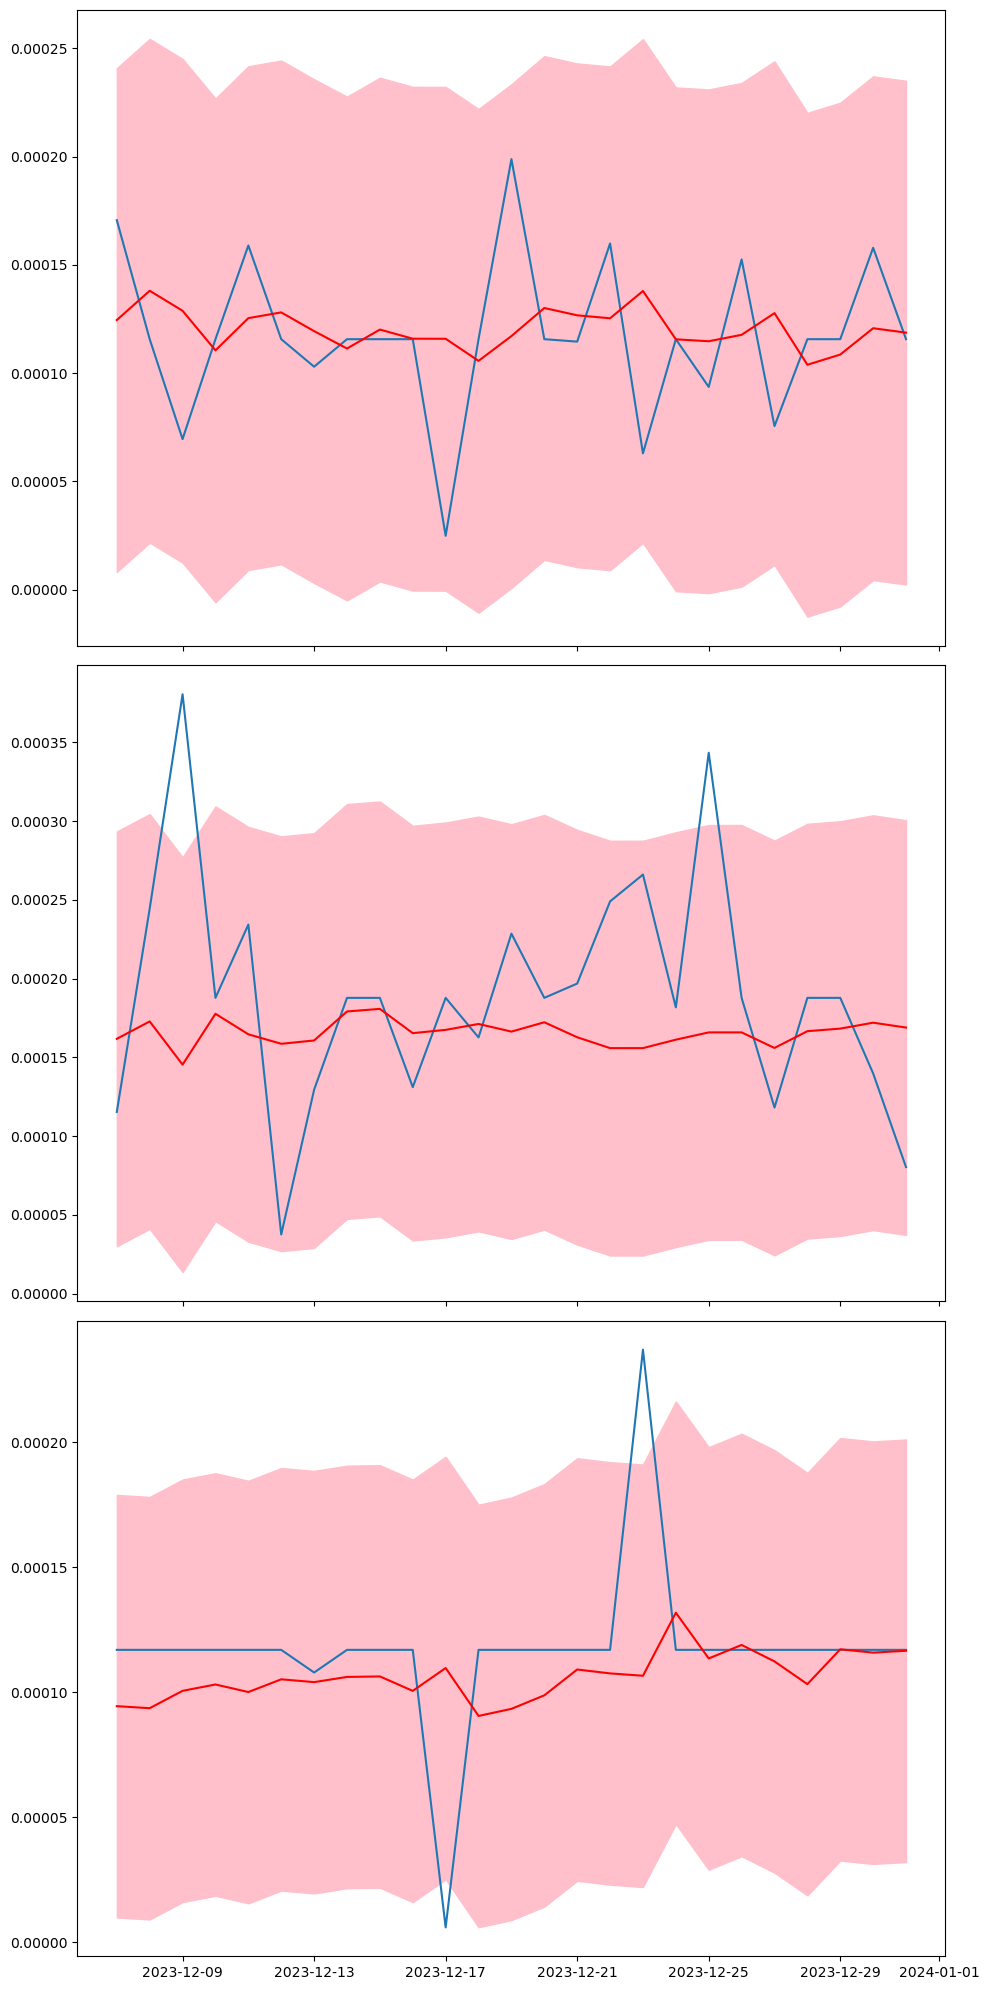

In [111]:
from statsmodels.tsa.arima.model import ARIMA
fig, axes = plt.subplots(nrows=len(weather_locations), ncols=1, figsize=(10, 20), sharex=True)
for (location, ax) in zip(weather_locations, axes):
    print('\n')
    print(location)
    print('\n')
    sub_df = complete_df[complete_df['Location'] == location]
    sub_df.set_index('Current_date', inplace=True)
    model = ARIMA(sub_df['HCHO reading'], order=(4,0,4), exog=sub_df[['Precipitation','Temperature_average']])
    results = model.fit()
    forecast = results.get_prediction(start=-25)
    mean_forecast = forecast.predicted_mean
    confidence_intervals = forecast.conf_int()
    print(confidence_intervals)
    print(sub_df.shape)
    ax.plot(mean_forecast.index, sub_df.loc[mean_forecast.index[0]: , 'HCHO reading'])
    ax.plot(mean_forecast.index,          
             mean_forecast.values,          
             color='red',          
             label='forecast')
    # Shade uncertainty area
    ax.fill_between(confidence_intervals.index, confidence_intervals['lower HCHO reading'], confidence_intervals['upper HCHO reading'] , color='pink')
plt.tight_layout()
plt.show()


In [40]:
print(weather_locations)
print(complete_df.columns)

['Kurunegala' 'Colombo' 'Nuwara Eliya']
Index(['HCHO reading', 'Location', 'Current_date', 'Next_date', 'Elevation',
       'Precipitation', 'Temperature_average'],
      dtype='object')


In [ ]:
date_range = pd.date_range(start="2019-01-01", end="2023-12-31", freq='D')  # 'D' for daily frequency
date_range_2 = pd.date_range(start="2019-01-02", end="2024-01-01", freq='D')

# Add a new column 'full_date_range' to the DataFrame
colombo_df = df[df["Location"] == "Colombo Proper"]
colombo_df.loc[:,"Location"] = "Colombo"
print(colombo_df.head())
colombo_df.loc[:, 'Current_date'] = date_range[:len(colombo_df)]
print(colombo_df.loc[1820:1825, :])

In [ ]:
matara_df = df[df["Location"] == "Deniyaya, Matara"]
matara_df = matara_df.reset_index(drop=True)
matara_df.loc[:,"Location"] = "Matara"
print(matara_df.head())
matara_df.loc[:, 'Current_date'] = date_range[:len(matara_df)]
print(matara_df.loc[1820:1825, :])

In [ ]:
Nuwaraeliya_df = df[df["Location"] == "Nuwara Eliya Proper"]
Nuwaraeliya_df = Nuwaraeliya_df.reset_index(drop=True)
Nuwaraeliya_df.loc[:,"Location"] = "Nuwara Eliya"
print(Nuwaraeliya_df.head())
Nuwaraeliya_df.loc[:, 'Current_date'] = date_range[:len(Nuwaraeliya_df)]
print(Nuwaraeliya_df.loc[1820:1825, :])

In [ ]:
kandy_df = df[df["Location"] == "Kandy Proper"]
kandy_df = kandy_df.reset_index(drop=True)
kandy_df.loc[:,"Location"] = "Kandy"
print(kandy_df.head())
kandy_df.loc[:, 'Current_date'] = date_range[:len(kandy_df)]
print(kandy_df.loc[1820:1825, :])

In [ ]:
bibile_df = df[df["Location"] == "Bibile, Monaragala"]
bibile_df = bibile_df.reset_index(drop=True)
bibile_df.loc[:,"Location"] = "Monaragala"
print(bibile_df.head())
bibile_df.loc[:, 'Current_date'] = date_range[:len(bibile_df)]
print(bibile_df.loc[1820:1825, :])

In [46]:
kurunegala_df = df[df["Location"] == "Kurunegala Proper"]
kurunegala_df = kurunegala_df.reset_index(drop=True)
kurunegala_df.loc[:,"Location"] = "Kurunegala"
print(kurunegala_df.head())
kurunegala_df.loc[:, 'Current_date'] = date_range[:len(kurunegala_df)]
print(kurunegala_df.loc[1820:1825, :])

   HCHO reading    Location Current_date   Next_date
0      0.000088  Kurunegala   2019-01-01  2019-01-02
1      0.000137  Kurunegala   2019-01-02  2019-01-03
2      0.000148  Kurunegala   2019-01-03  2019-01-04
3     -0.000002  Kurunegala   2019-01-04  2019-01-05
4      0.000249  Kurunegala   2019-01-05  2019-01-06
      HCHO reading    Location         Current_date   Next_date
1820      0.000152  Kurunegala  2023-12-26 00:00:00  2023-12-27
1821      0.000075  Kurunegala  2023-12-27 00:00:00  2023-12-28
1822           NaN  Kurunegala  2023-12-28 00:00:00  2023-12-29
1823           NaN  Kurunegala  2023-12-29 00:00:00  2023-12-30
1824      0.000158  Kurunegala  2023-12-30 00:00:00  2023-12-31
1825           NaN  Kurunegala  2023-12-31 00:00:00  2024-01-01


In [47]:
jaffna_df = df[df["Location"] == "Jaffna Proper"]
jaffna_df = jaffna_df.reset_index(drop=True)
jaffna_df.loc[:,"Location"] = "Jaffna"
print(jaffna_df.head())
jaffna_df.loc[:, 'Current_date'] = date_range[:len(jaffna_df)]
print(jaffna_df.loc[1820:1825, :])

   HCHO reading Location Current_date   Next_date
0      0.000058   Jaffna   2019-01-01  2019-01-02
1      0.000102   Jaffna   2019-01-02  2019-01-03
2      0.000039   Jaffna   2019-01-03  2019-01-04
3     -0.000002   Jaffna   2019-01-04  2019-01-05
4      0.000159   Jaffna   2019-01-05  2019-01-06
      HCHO reading Location         Current_date   Next_date
1820 -7.696313e-08   Jaffna  2023-12-26 00:00:00  2023-12-27
1821           NaN   Jaffna  2023-12-27 00:00:00  2023-12-28
1822  5.139770e-05   Jaffna  2023-12-28 00:00:00  2023-12-29
1823  1.267235e-04   Jaffna  2023-12-29 00:00:00  2023-12-30
1824  1.166590e-04   Jaffna  2023-12-30 00:00:00  2023-12-31
1825  6.540853e-05   Jaffna  2023-12-31 00:00:00  2024-01-01


In [49]:
df = pd.read_csv('kan_output.csv', names = column_names)
print(df.head())
print(df.loc[1820:1825, :])

   HCHO reading      Location Current_date   Next_date
0      0.000176  Kandy Proper   2019-01-01  2019-01-02
1      0.000092  Kandy Proper   2019-01-02  2019-01-03
2           NaN  Kandy Proper   2019-01-03  2019-01-04
3      0.000191  Kandy Proper   2019-01-04  2019-01-05
4      0.000122  Kandy Proper   2019-01-05  2019-01-06
      HCHO reading      Location Current_date   Next_date
1820           NaN  Kandy Proper   2023-12-26  2023-12-27
1821           NaN  Kandy Proper   2023-12-27  2023-12-28
1822           NaN  Kandy Proper   2023-12-28  2023-12-29
1823           NaN  Kandy Proper   2023-12-29  2023-12-30
1824      0.000056  Kandy Proper   2023-12-30  2023-12-31
1825           NaN  Kandy Proper   2023-12-31  2024-01-01
